In [270]:
from typing import List
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import plot_functions as plt_fct
import gc

In [271]:
df = pd.read_csv("ar41_with_k_algo.csv", sep=",", parse_dates=True, index_col="timestamps_UTC")
#gc.collect()


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
df[["cluster"]].value_counts()

cluster
2          13507689
1           3165942
0            426721
dtype: int64

In [ ]:
(df[["cluster"]].value_counts() / len(df[["cluster"]])).round(2)

cluster
2          0.79
1          0.19
0          0.02
dtype: float64

In [ ]:
df2 = pd.read_csv("ar41_with_fuzzy.csv", sep=",", parse_dates=True, index_col="timestamps_UTC")


In [ ]:
df2.columns[0]

'Unnamed: 0'

In [ ]:
df2 = df2.drop(["Unnamed: 0"], axis=1)

In [ ]:
df2.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-08-01 03:44:12          181.0  50.769818  3.872114                27.0   
2023-08-01 06:36:29          143.0  51.039993  3.693429                33.0   
2023-08-24 06:53:54          183.0  50.742203  3.602035                31.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-08-01 03:44:12                23.0              255.0              238.0   
2023-08-01 06:36:29                32.0              272.0              324.0   
2023-08-24 06:53:54                33.0              234.0              182.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-08-01 03:44:12         794.0         801.0              83.0   
2023-08-01 06:36:29         802.0         804.0              78.0   
2023-08-24 06:53:54         799.0         802.0              82.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-08-01 03:44:12              81.0              76.0              77.0   
2023-08-01 06:36:29              78.0              73.0              74.0   
2023-08-24 06:53:54              82.0              85.0              87.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-08-01 03:44:12         14.8            0.0           18.6         0.1   
2023-08-01 06:36:29         14.4            0.0           19.1         1.1   
2023-08-24 06:53:54         18.2            0.0           12.1         2.4   

                     cluster  
timestamps_UTC                
2023-08-01 03:44:12        0  
2023-08-01 06:36:29        0  
2023-08-24 06:53:54        0

In [ ]:
df2[["cluster"]].value_counts()

cluster
0          13930657
1           3169695
dtype: int64

In [ ]:
(df2[["cluster"]].value_counts() / len(df2[["cluster"]])).round(2)

cluster
0          0.81
1          0.19
dtype: float64

In [ ]:
df = pd.read_csv(
    "results_norma\cluster_0_ar41_with_isolation_forest_cluster.csv",
    sep=",",
    parse_dates=True,
    index_col="timestamps_UTC",
).rename(columns={"cluster_0": "cluster"})
df = df[~df.index.year.isin([2022])]

In [ ]:
df.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-08-01 03:44:12          181.0  50.769818  3.872114                27.0   
2023-08-01 06:36:29          143.0  51.039993  3.693429                33.0   
2023-08-24 06:53:54          183.0  50.742203  3.602035                31.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-08-01 03:44:12                23.0              255.0              238.0   
2023-08-01 06:36:29                32.0              272.0              324.0   
2023-08-24 06:53:54                33.0              234.0              182.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-08-01 03:44:12         794.0         801.0              83.0   
2023-08-01 06:36:29         802.0         804.0              78.0   
2023-08-24 06:53:54         799.0         802.0              82.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-08-01 03:44:12              81.0              76.0              77.0   
2023-08-01 06:36:29              78.0              73.0              74.0   
2023-08-24 06:53:54              82.0              85.0              87.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-08-01 03:44:12         14.8            0.0           18.6         0.1   
2023-08-01 06:36:29         14.4            0.0           19.1         1.1   
2023-08-24 06:53:54         18.2            0.0           12.1         2.4   

                     cluster  
timestamps_UTC                
2023-08-01 03:44:12        1  
2023-08-01 06:36:29        1  
2023-08-24 06:53:54        1

In [ ]:
df[["cluster"]].value_counts()

cluster
 1         15638600
-1          1461729
dtype: int64

In [ ]:
(df[["cluster"]].value_counts() / len(df[["cluster"]])).round(2)

cluster
 1         0.91
-1         0.09
dtype: float64

In [ ]:
monthly_counts = df.resample("M")["mapped_veh_id"].nunique()
monthly_counts

timestamps_UTC
2023-01-31    90
2023-02-28    89
2023-03-31    89
2023-04-30    89
2023-05-31    87
2023-06-30    89
2023-07-31    87
2023-08-31    86
2023-09-30    88
Freq: M, Name: mapped_veh_id, dtype: int64

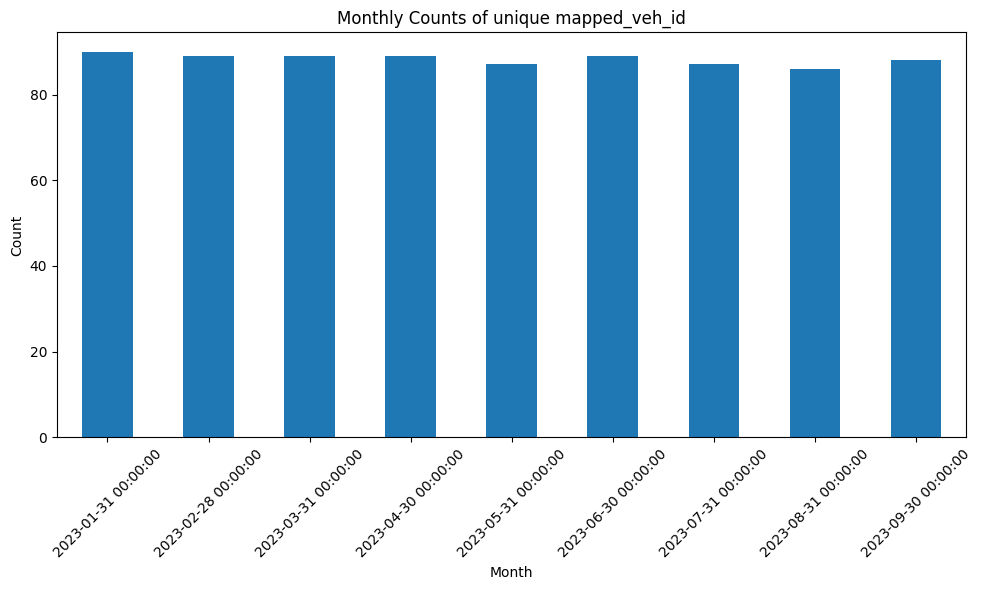

In [ ]:
monthly_counts.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly Counts of unique mapped_veh_id")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_within_date_range = df["2023-01-02":"2023-01-03"]

C:\Users\Django\AppData\Local\Temp\ipykernel_16824\3647691533.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_within_date_range = df["2023-01-02":"2023-01-03"]


In [ ]:
features_list = [
    "RS_E_InAirTemp_PC1",
    "RS_E_InAirTemp_PC2",
    "RS_E_OilPress_PC1",
    "RS_E_OilPress_PC2",
    "RS_E_RPM_PC1",
    "RS_E_RPM_PC2",
    "RS_E_WatTemp_PC1",
    "RS_E_WatTemp_PC2",
    "RS_T_OilTemp_PC1",
    "RS_T_OilTemp_PC2",
    "temperature",
    "precipitation",
    "windspeed_10m",
    "sum_pollen",
]

In [ ]:
data_within_date_range_with_feature = data_within_date_range[["mapped_veh_id","RS_E_RPM_PC1", "RS_E_RPM_PC2"]]

In [ ]:
data_within_date_range_with_feature.head(3)

mapped_veh_id  RS_E_RPM_PC1  RS_E_RPM_PC2
timestamps_UTC                                                
2023-01-04 20:34:03          114.0         795.0         803.0
2023-01-05 03:23:00          114.0         793.0         802.0
2023-01-05 19:08:36          114.0         797.0         802.0

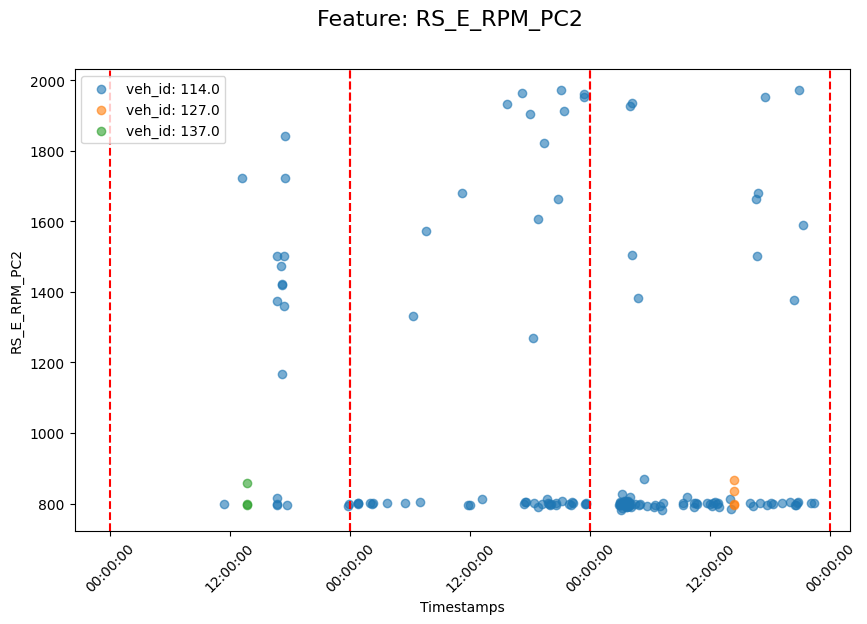

In [ ]:
import matplotlib.dates as mdates


def plot_veh_feature_for_all_dates(unique_dates, feature, data_within_date_range_with_feature, mapped_veh_ids):
    fig, axs = plt.subplots(figsize=(10, 6))
    fig.suptitle(f"Feature: {feature}", fontsize=16)

    for veh_id in mapped_veh_ids:
        veh_data = data_within_date_range_with_feature[data_within_date_range_with_feature["mapped_veh_id"] == veh_id]
        axs.scatter(veh_data.index, veh_data[feature], label=f"veh_id: {veh_id}",alpha=0.6)

    axs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
    plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility
    axs.set_xlabel("Timestamps")
    axs.set_ylabel(feature)
    axs.legend()

    # Adding lines at the start and end of each day
    for date in unique_dates:
        start_of_day = np.datetime64(date)
        end_of_day = start_of_day + np.timedelta64(1, "D")  # Add a day to the start_of_day
        axs.axvline(start_of_day, color="r", linestyle="--")
        axs.axvline(end_of_day, color="r", linestyle="--")

    plt.show()


mapped_veh_ids = data_within_date_range_with_feature["mapped_veh_id"].unique()
unique_dates = np.unique(data_within_date_range_with_feature.index.date)
unique_features = data_within_date_range_with_feature.columns[1:]  # Exclude 'mapped_veh_id' column

for feature in unique_features[1:2]:
    plot_veh_feature_for_all_dates(unique_dates, feature, data_within_date_range_with_feature, mapped_veh_ids)

In [ ]:
features_list

['RS_E_InAirTemp_PC1',
 'RS_E_InAirTemp_PC2',
 'RS_E_OilPress_PC1',
 'RS_E_OilPress_PC2',
 'RS_E_RPM_PC1',
 'RS_E_RPM_PC2',
 'RS_E_WatTemp_PC1',
 'RS_E_WatTemp_PC2',
 'RS_T_OilTemp_PC1',
 'RS_T_OilTemp_PC2',
 'temperature',
 'precipitation',
 'windspeed_10m',
 'sum_pollen']

In [ ]:
data_within_date_range = df["2023-01-02":"2023-01-05"]
data_within_date_range_with_feature = data_within_date_range[features_list + ["mapped_veh_id"]]
data_within_date_range_with_feature.head(3)

C:\Users\Django\AppData\Local\Temp\ipykernel_16824\3254703296.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



RS_E_InAirTemp_PC1  RS_E_InAirTemp_PC2  \
timestamps_UTC                                                
2023-01-04 20:34:03                17.0                32.0   
2023-01-05 03:23:00                13.0                20.0   
2023-01-05 19:08:36                17.0                35.0   

                     RS_E_OilPress_PC1  RS_E_OilPress_PC2  RS_E_RPM_PC1  \
timestamps_UTC                                                            
2023-01-04 20:34:03              224.0              217.0         795.0   
2023-01-05 03:23:00              244.0              241.0         793.0   
2023-01-05 19:08:36              217.0              210.0         797.0   

                     RS_E_RPM_PC2  RS_E_WatTemp_PC1  RS_E_WatTemp_PC2  \
timestamps_UTC                                                          
2023-01-04 20:34:03         803.0              79.0              78.0   
2023-01-05 03:23:00         802.0              77.0              78.0   
2023-01-05 19:08:36         802.0              80.0              80.0   

                     RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  temperature  \
timestamps_UTC                                                         
2023-01-04 20:34:03              77.0              76.0         11.4   
2023-01-05 03:23:00              66.0              71.0         10.8   
2023-01-05 19:08:36              77.0              79.0         10.9   

                     precipitation  windspeed_10m  sum_pollen  mapped_veh_id  
timestamps_UTC                                                                
2023-01-04 20:34:03            0.0           28.4         0.0          114.0  
2023-01-05 03:23:00            0.0           22.3         0.0          114.0  
2023-01-05 19:08:36            0.0           16.7         0.0          114.0

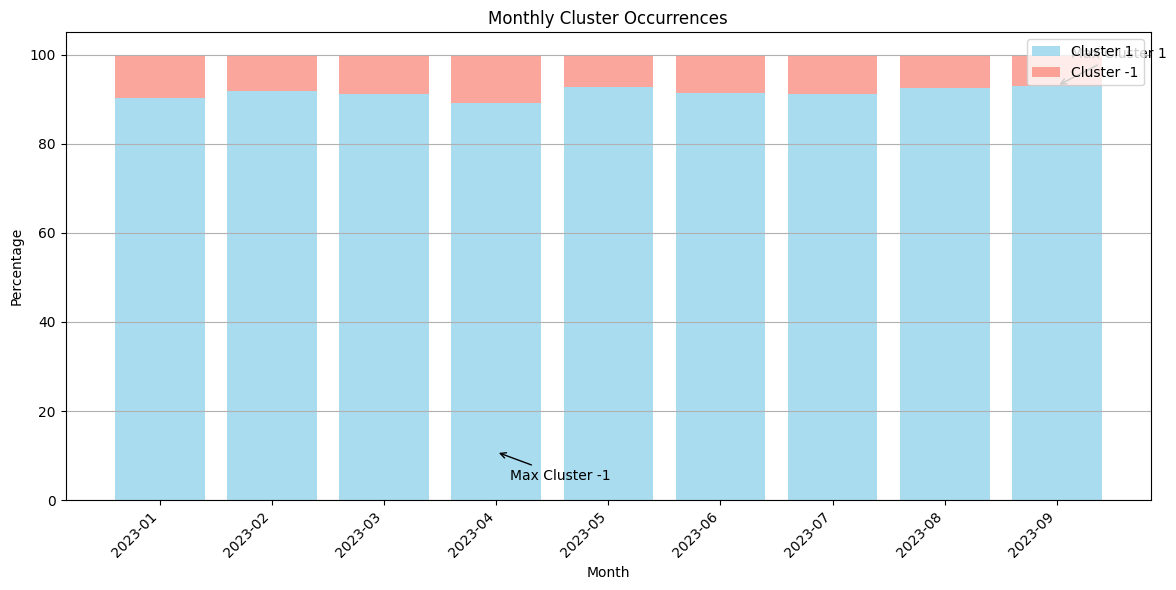

In [ ]:

def plot_monthly_cluster_percentages(df):
    # Grouping the data by month and cluster
    monthly_clusters = df.groupby([df.index.to_period("M"), "cluster"]).size().unstack(fill_value=0)

    # Calculating percentages for each cluster class within each month
    monthly_percentages = monthly_clusters.div(monthly_clusters.sum(axis=1), axis=0) * 100
    monthly_percentages = monthly_percentages.round(2)  # Round the percentages to 2 decimal places

    # Finding months with the most occurrences of cluster 1 and -1
    max_cluster_1_month = monthly_percentages[1].idxmax().strftime("%Y-%m")
    max_cluster_neg1_month = monthly_percentages[-1].idxmax().strftime("%Y-%m")

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plotting percentages for cluster 1
    ax.bar(
        monthly_percentages.index.strftime("%Y-%m"),
        monthly_percentages[1],
        label="Cluster 1",
        color="skyblue",
        alpha=0.7,
    )

    # Plotting percentages for cluster -1
    ax.bar(
        monthly_percentages.index.strftime("%Y-%m"),
        monthly_percentages[-1],
        label="Cluster -1",
        color="salmon",
        alpha=0.7,
        bottom=monthly_percentages[1],
    )

    # Annotate months with the most occurrences of clusters 1 and -1
    ax.annotate(
        "Max Cluster 1",
        (max_cluster_1_month, monthly_percentages.loc[max_cluster_1_month, 1]),
        xytext=(10, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.annotate(
        "Max Cluster -1",
        (max_cluster_neg1_month, monthly_percentages.loc[max_cluster_neg1_month, -1]),
        xytext=(10, -20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.set_xlabel("Month")
    ax.set_ylabel("Percentage")
    ax.set_title("Monthly Cluster Occurrences")
    ax.legend()
    ax.grid(axis="y")

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


# Assuming df is your DataFrame with a date index and the 'cluster' column
plot_monthly_cluster_percentages(df)

## Analyze month with most outlier

In [ ]:
monthly_clusters = df.groupby([df.index.to_period("M"), "cluster"]).size().unstack(fill_value=0)
monthly_percentages = monthly_clusters.div(monthly_clusters.sum(axis=1), axis=0) * 100
monthly_percentages = monthly_percentages.round(2)
most_cluster_neg1_month = monthly_percentages[-1].idxmax()
most_cluster_neg1_month

Period('2023-04', 'M')

In [ ]:
data_within_date_range_with_feature = df[df.index.to_period("M") == most_cluster_neg1_month]
data_within_date_range_with_feature.head(3)
sample_number = 1
cluster_1_vehicles = data_within_date_range_with_feature[data_within_date_range_with_feature["cluster"] == 1][
    "mapped_veh_id"
].sample(sample_number)
cluster_neg1_vehicles = data_within_date_range_with_feature[data_within_date_range_with_feature["cluster"] == -1][
    "mapped_veh_id"
].sample(sample_number)

selected_vehicles = pd.concat([cluster_1_vehicles, cluster_neg1_vehicles])

In [ ]:
selected_vehicles.values

array([111., 139.])

In [ ]:
data_within_date_range_with_feature_only_sampled = data_within_date_range_with_feature[
    data_within_date_range_with_feature["mapped_veh_id"].isin(selected_vehicles.values)
]
data_within_date_range_with_feature_only_sampled.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-04-18 01:59:49          111.0  50.095440  4.525210                22.0   
2023-04-18 02:26:25          139.0  50.774050  3.873057                12.0   
2023-04-18 04:08:22          139.0  50.765237  3.868594                22.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-04-18 01:59:49                13.0              279.0              317.0   
2023-04-18 02:26:25                12.0              565.0              531.0   
2023-04-18 04:08:22                22.0              286.0              272.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-04-18 01:59:49         797.0         798.0              69.0   
2023-04-18 02:26:25         800.0         798.0              38.0   
2023-04-18 04:08:22         805.0         797.0              82.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-04-18 01:59:49              64.0              60.0              57.0   
2023-04-18 02:26:25              35.0              28.0              28.0   
2023-04-18 04:08:22              77.0              77.0              76.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-04-18 01:59:49          7.6            0.0           14.5       118.2   
2023-04-18 02:26:25          7.0            0.0           13.0       128.9   
2023-04-18 04:08:22          6.1            0.0           12.6       209.4   

                     cluster  
timestamps_UTC                
2023-04-18 01:59:49        1  
2023-04-18 02:26:25       -1  
2023-04-18 04:08:22        1

In [ ]:
unique_dates = data_within_date_range_with_feature_only_sampled.index.unique()
unique_features = np.sort(
    data_within_date_range_with_feature_only_sampled.columns[3:]
)  # Exclude 'mapped_veh_id' column

In [ ]:
import matplotlib.dates as mdates
from random import randint, seed

seed(3)


def plot_veh_feature_for_all_dates(
    unique_dates, feature, data_within_date_range_with_feature, mapped_veh_ids, add_date_line=True
):
    fig, axs = plt.subplots(figsize=(10, 6))
    fig.suptitle(f"Feature: {feature}", fontsize=16)
    colors = sns.color_palette("husl", 10)
    for cluster in [1, -1]:
        cluster_data = data_within_date_range_with_feature[data_within_date_range_with_feature["cluster"] == cluster]
        if cluster < 0:
            mean = cluster_data[feature].mean()
            axs.axhline(mean, color="orange", linestyle="--", alpha=0.8, label=f"Outlier Mean {mean:.2f}")
            median = cluster_data[feature].median()
            axs.axhline(
                median,
                color="blue",
                linestyle="--",
                alpha=0.8,
                label=f"Outlier Median {median:.2f}",
            )
            axs.axhline(
                mean + cluster_data[feature].std(),
                color="green",
                linestyle="--",
                alpha=0.6,
                label="Mean ± Std",
            )
            axs.axhline(mean - cluster_data[feature].std(), color="green", linestyle="--", alpha=0.6)
        for i, veh_id in enumerate(mapped_veh_ids):
            if cluster < 0:
                outliers = cluster_data[cluster_data["mapped_veh_id"] == veh_id]
                axs.scatter(
                    outliers.index,
                    outliers[feature],
                    label=f"Outliers: veh_id: {veh_id}, cluster: {cluster}",
                    alpha=0.3,
                    s=10,
                    color="red",
                )

            else:
                inliers = cluster_data[cluster_data["mapped_veh_id"] == veh_id]
                axs.scatter(
                    inliers.index,
                    inliers[feature],
                    label=f"Inliers: veh_id: {veh_id}, cluster: {cluster}",
                    alpha=0.6,
                    color=colors[(i + 2) % 10],
                )

    # axs.xaxis.set_major_formatter(mdates.DateFormatter("%D %H:%M:%S"))
    plt.xticks(rotation=45)  # Rotate X-axis labels for better visibility
    axs.set_xlabel("Timestamps")
    axs.set_ylabel(feature)

    if add_date_line:
        start_of_month = unique_dates.min()
        end_of_month = unique_dates.max()

        # Adding lines every 10 days within the month
        start_date = start_of_month
        while start_date < end_of_month:
            ten_days_later = start_date + np.timedelta64(5, "D")
            if ten_days_later < end_of_month:
                axs.axvline(ten_days_later, color="black", linestyle=":")
            start_date = ten_days_later

    #     # Setting x-axis limits for the entire month
    #     axs.set_xlim(start_of_month, end_of_month)
    axs.legend(loc="upper right")  # Modify the legend location
    plt.tight_layout()
    plt.show()

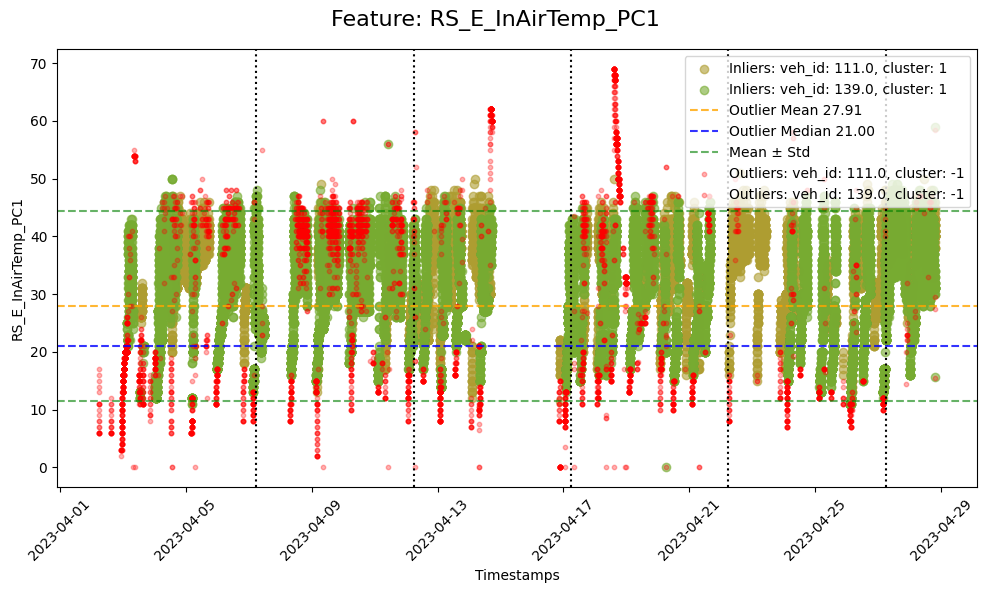

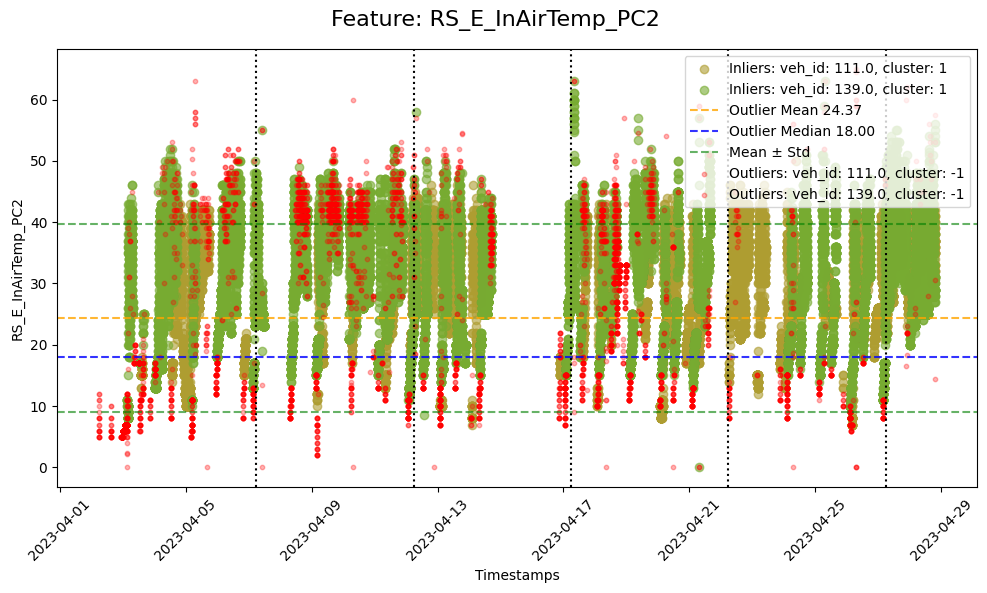

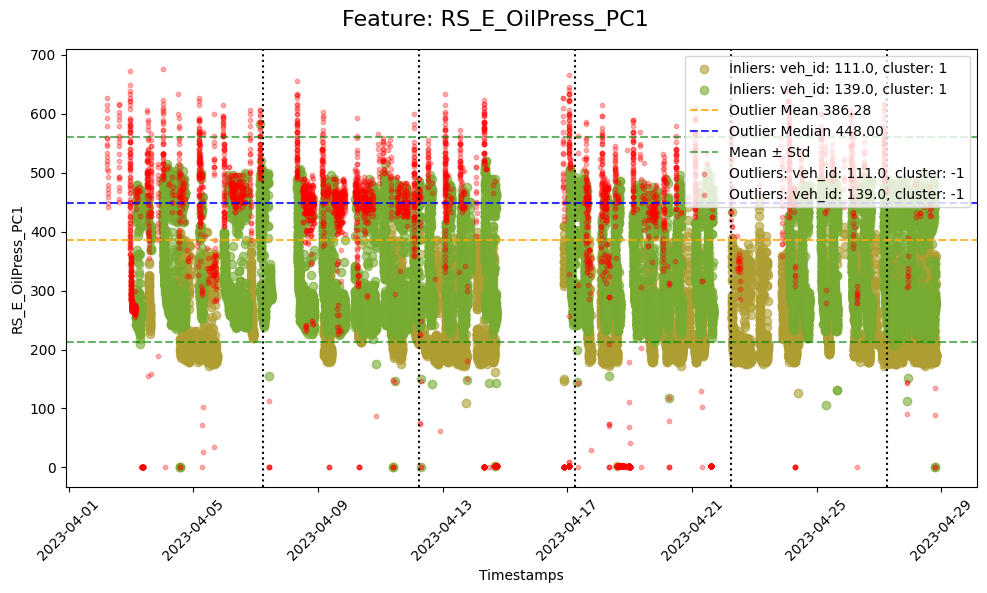

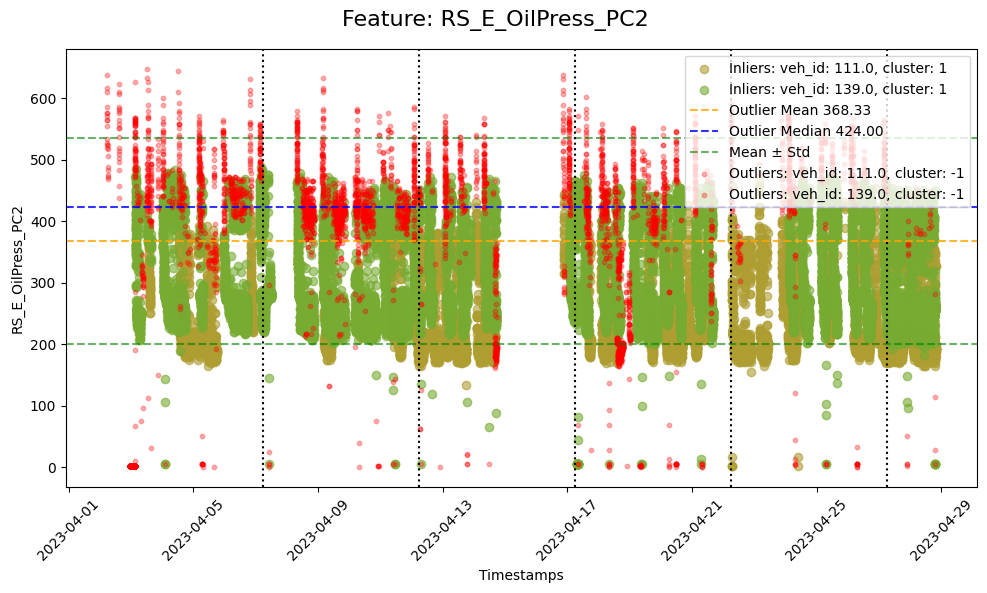

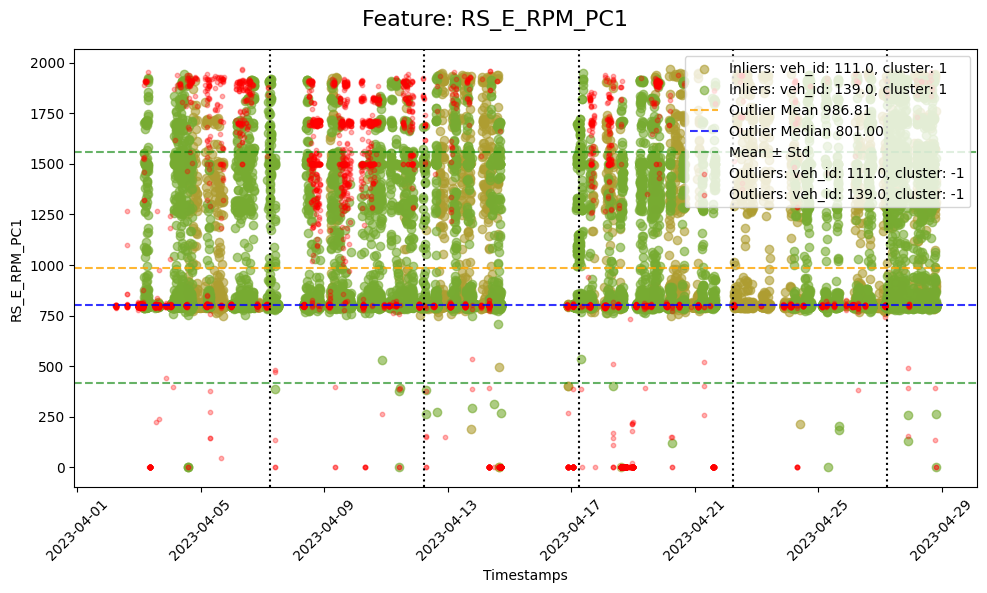

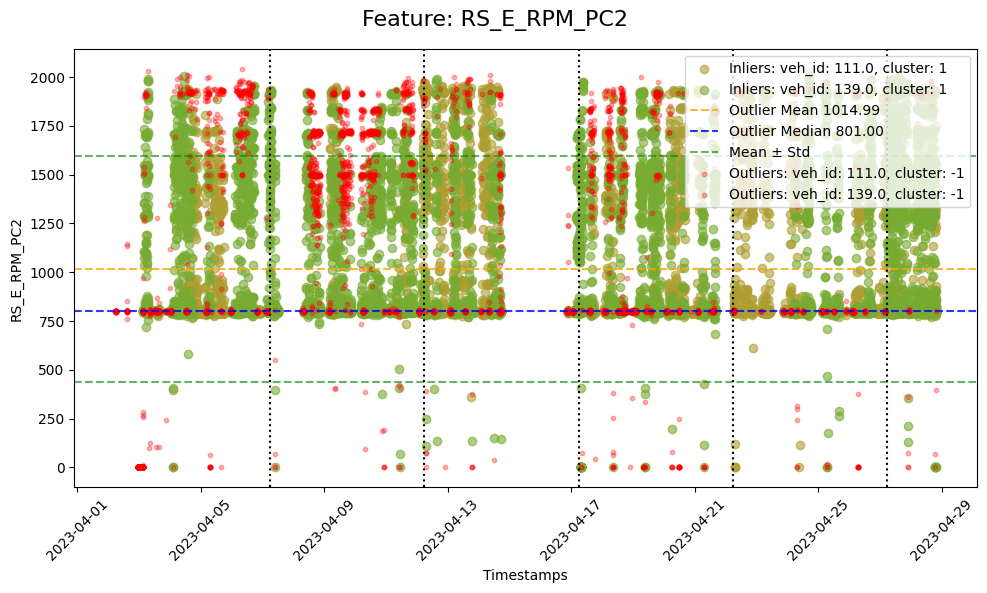

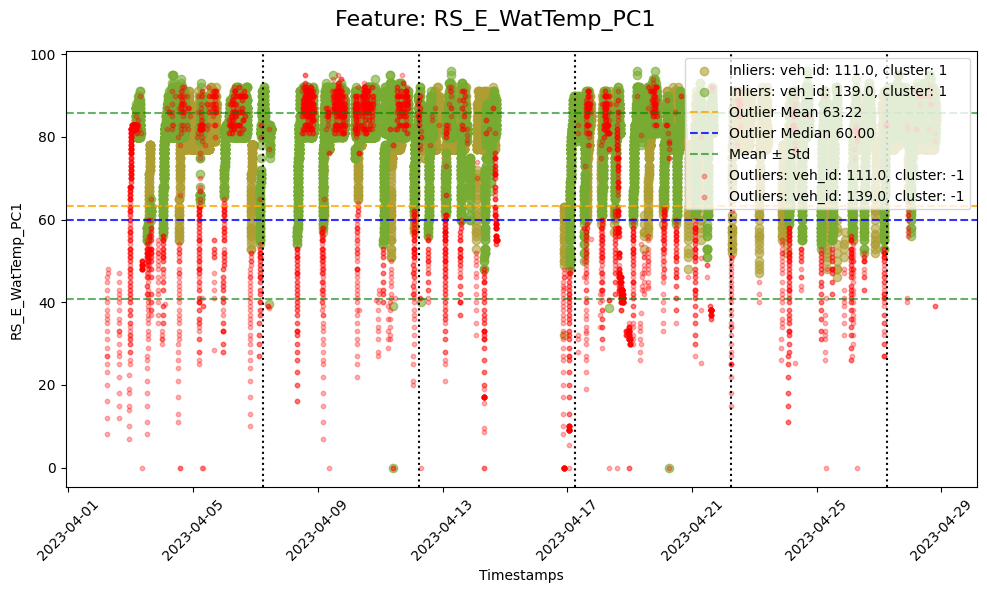

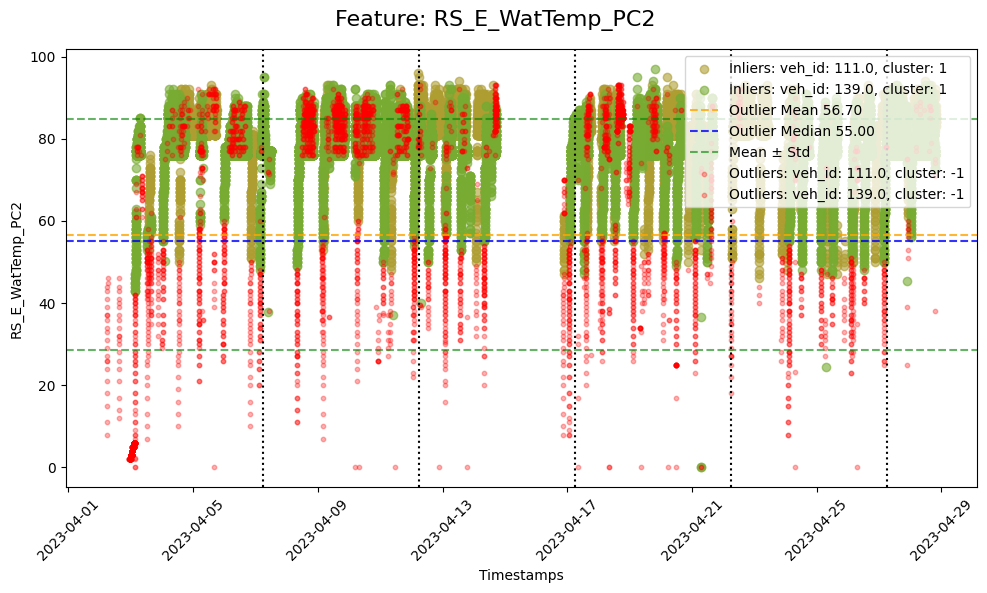

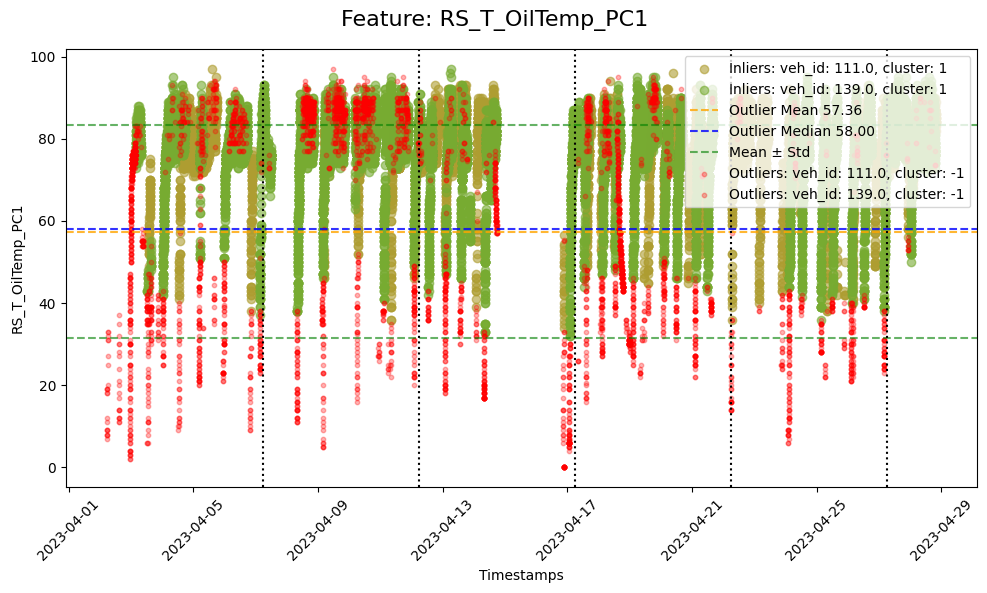

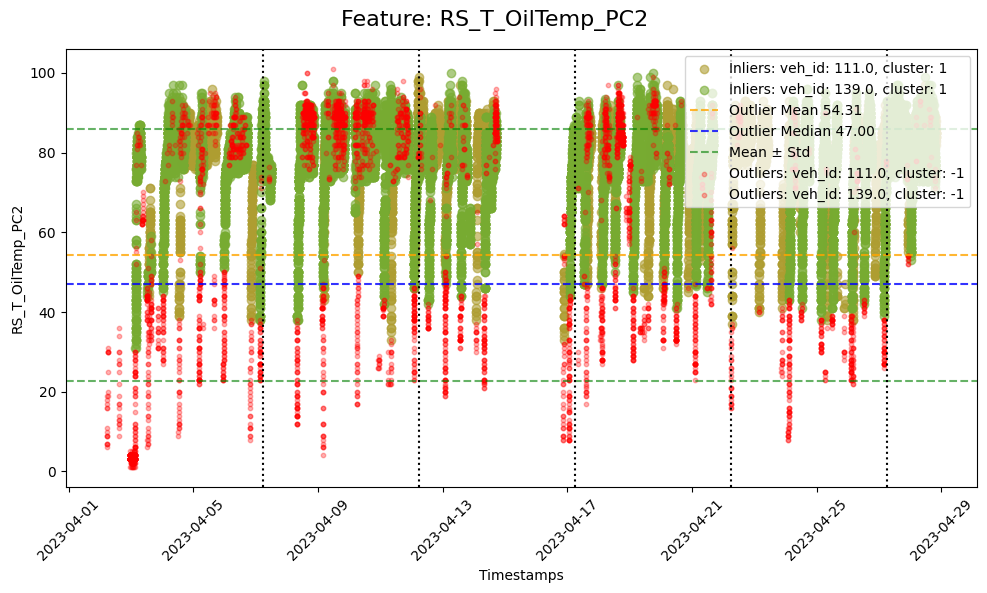

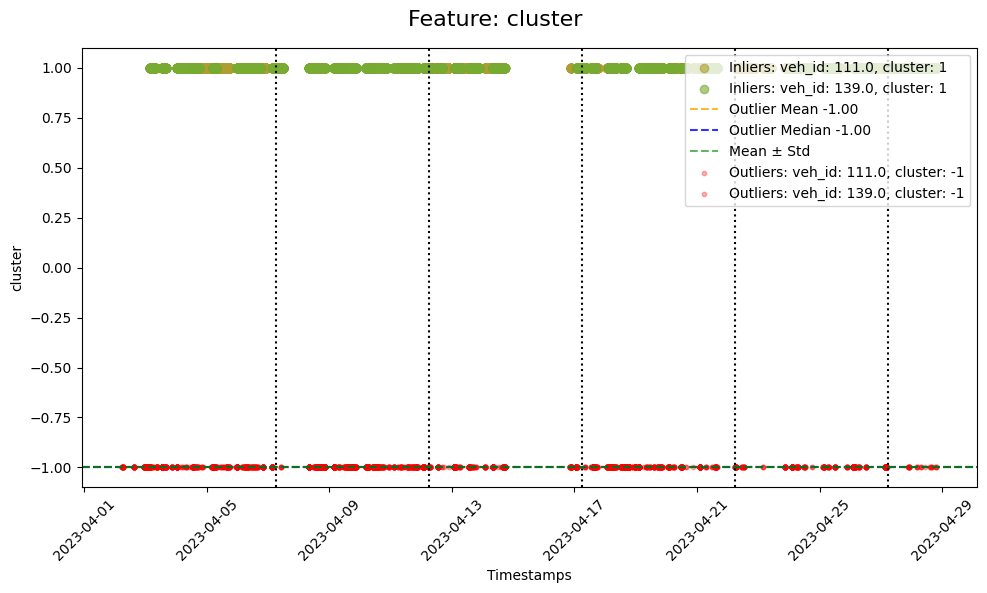

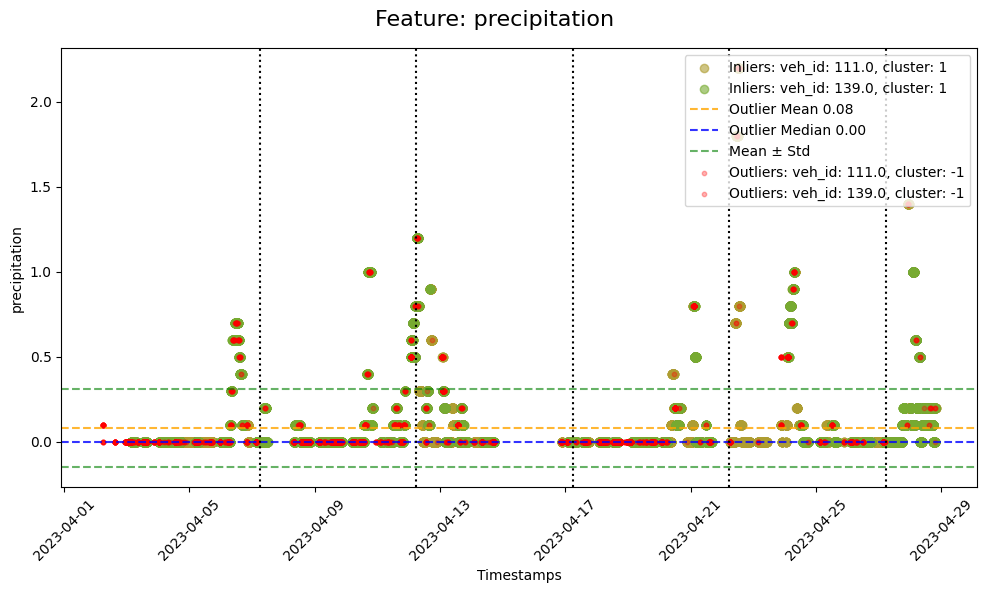

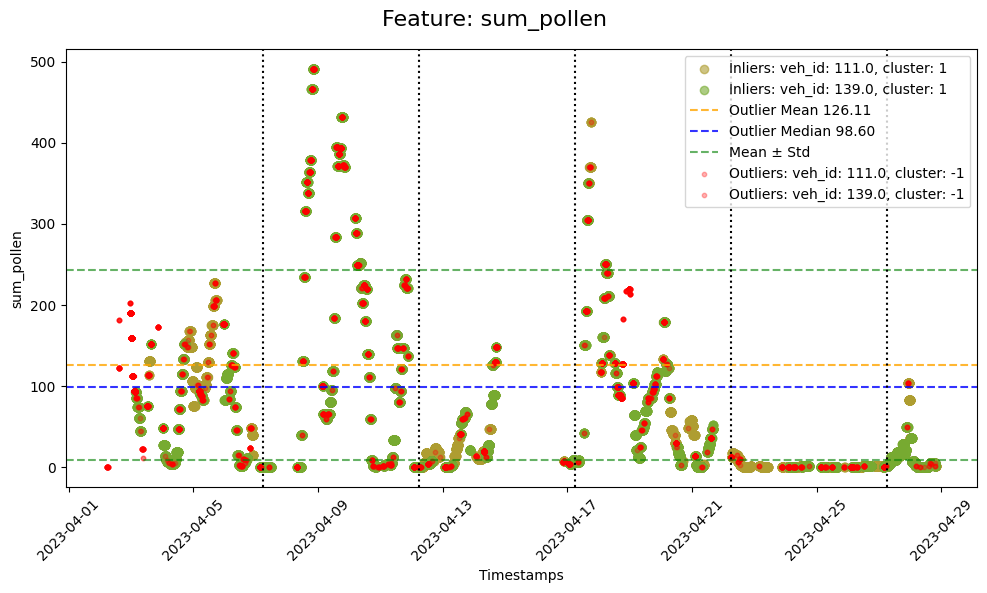

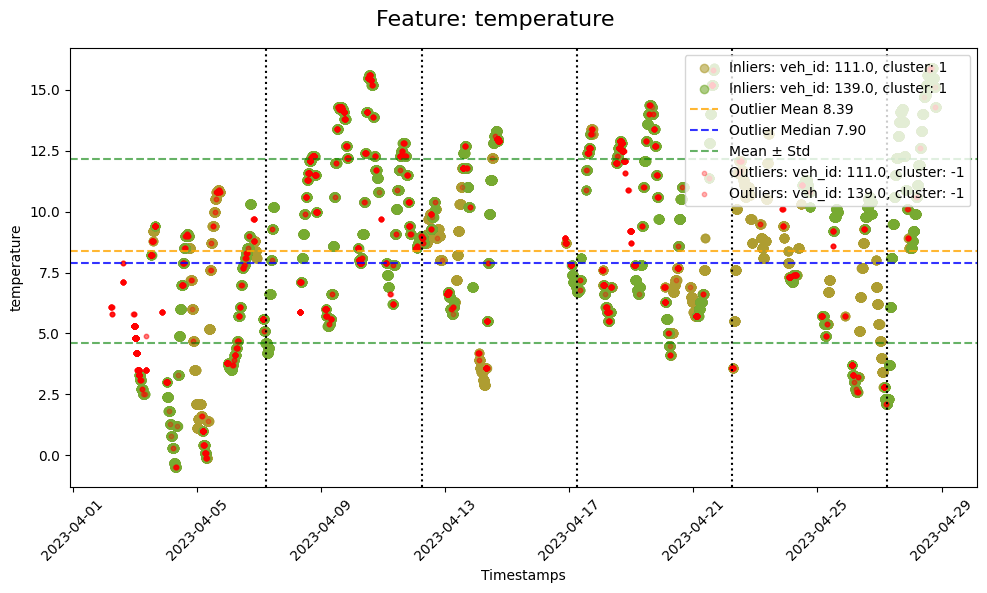

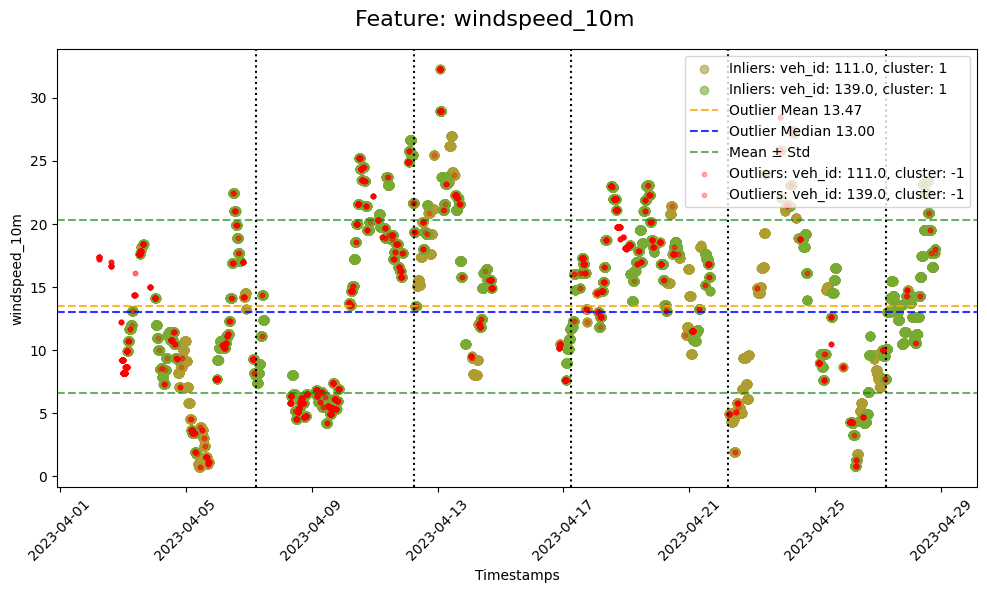

In [ ]:
for feature in unique_features:
    plot_veh_feature_for_all_dates(
        unique_dates, feature, data_within_date_range_with_feature_only_sampled, selected_vehicles
    )

In [ ]:
selected_vehicles

timestamps_UTC
2023-04-14 14:24:40    111.0
2023-04-13 02:11:14    139.0
Name: mapped_veh_id, dtype: float64

In [ ]:
data_within_date_range_with_feature = df[df.index.to_period("M") == most_cluster_neg1_month]
data_within_date_range_with_feature.head(3)
sample_number = 1
cluster_1_vehicles = data_within_date_range_with_feature[data_within_date_range_with_feature["cluster"] == 1][
    "mapped_veh_id"
].sample(sample_number)
cluster_neg1_vehicles = data_within_date_range_with_feature[data_within_date_range_with_feature["cluster"] == -1][
    "mapped_veh_id"
].sample(sample_number)

selected_vehicles = pd.concat([cluster_1_vehicles, cluster_neg1_vehicles])
selected_vehicles

timestamps_UTC
2023-04-15 20:39:08    173.0
2023-04-09 18:37:03    123.0
Name: mapped_veh_id, dtype: float64

In [ ]:
data_within_date_range_with_feature_only_sampled = data_within_date_range_with_feature[
    data_within_date_range_with_feature["mapped_veh_id"].isin(selected_vehicles.values)
]
data_within_date_range_with_feature_only_sampled.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-04-18 02:56:39          173.0  50.094823  4.526860                21.0   
2023-04-18 03:10:39          173.0  50.094839  4.526876                22.0   
2023-04-18 04:59:49          173.0  50.237075  4.507046                38.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-04-18 02:56:39                17.0              210.0              282.0   
2023-04-18 03:10:39                18.0              200.0              276.0   
2023-04-18 04:59:49                37.0              186.0              210.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-04-18 02:56:39         795.0         805.0              80.0   
2023-04-18 03:10:39         777.0         803.0              80.0   
2023-04-18 04:59:49         794.0         742.0              82.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-04-18 02:56:39              77.0              74.0              71.0   
2023-04-18 03:10:39              80.0              76.0              73.0   
2023-04-18 04:59:49              82.0              82.0              80.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-04-18 02:56:39          7.0            0.0           13.0       128.9   
2023-04-18 03:10:39          6.6            0.0           11.8       160.9   
2023-04-18 04:59:49          6.1            0.0           12.6       209.4   

                     cluster  
timestamps_UTC                
2023-04-18 02:56:39        1  
2023-04-18 03:10:39        1  
2023-04-18 04:59:49        1

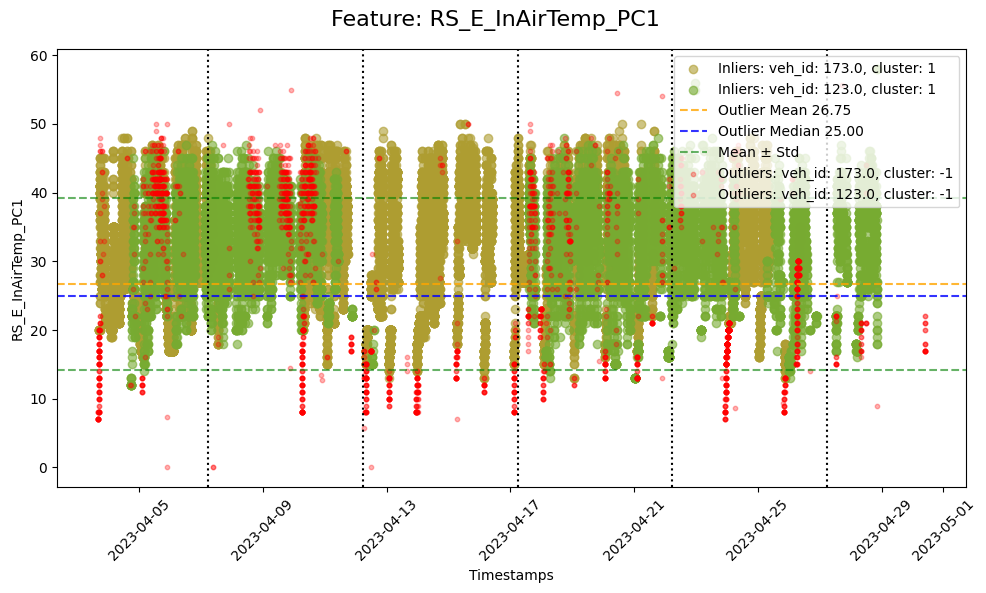

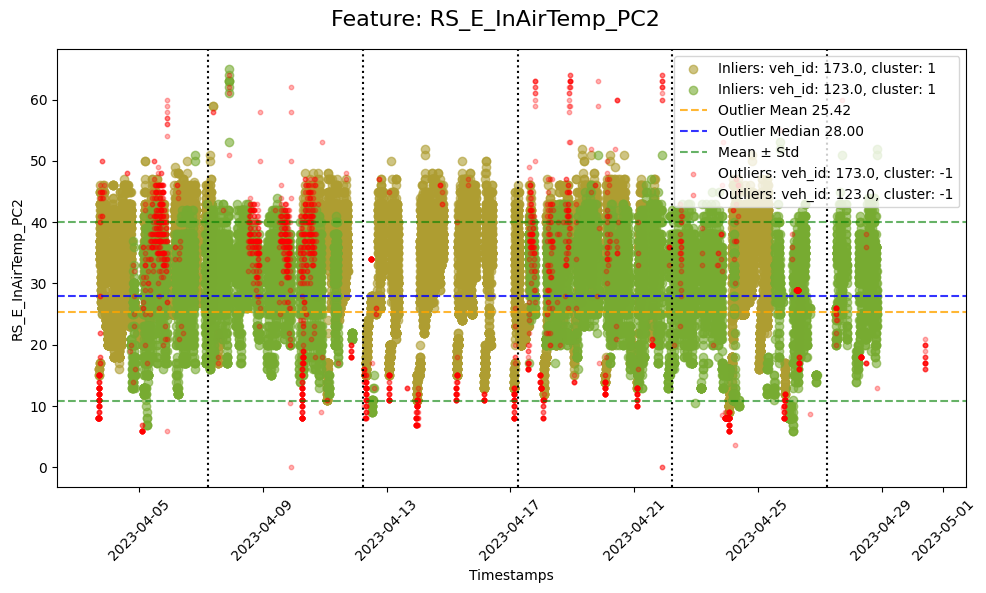

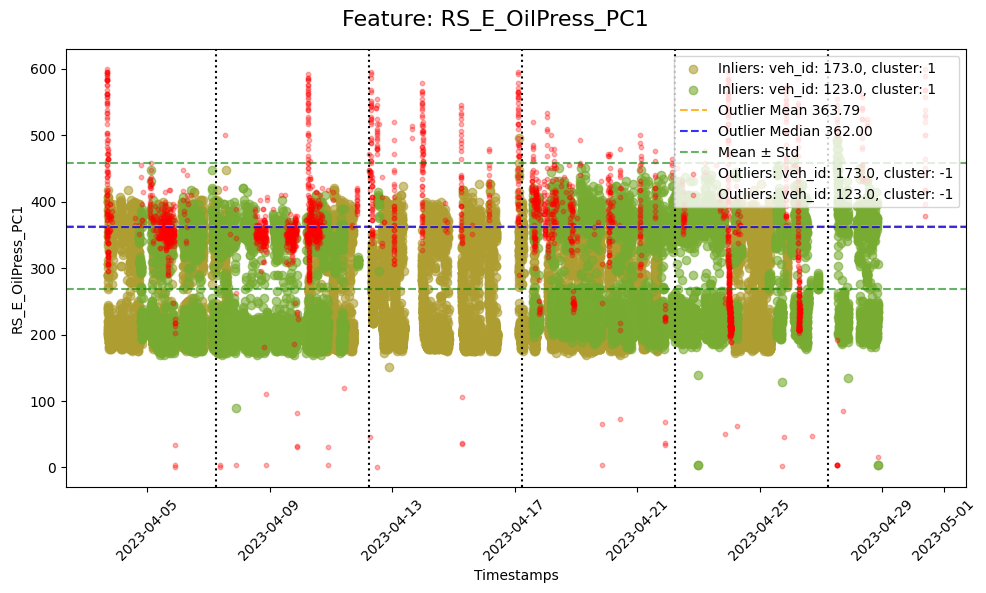

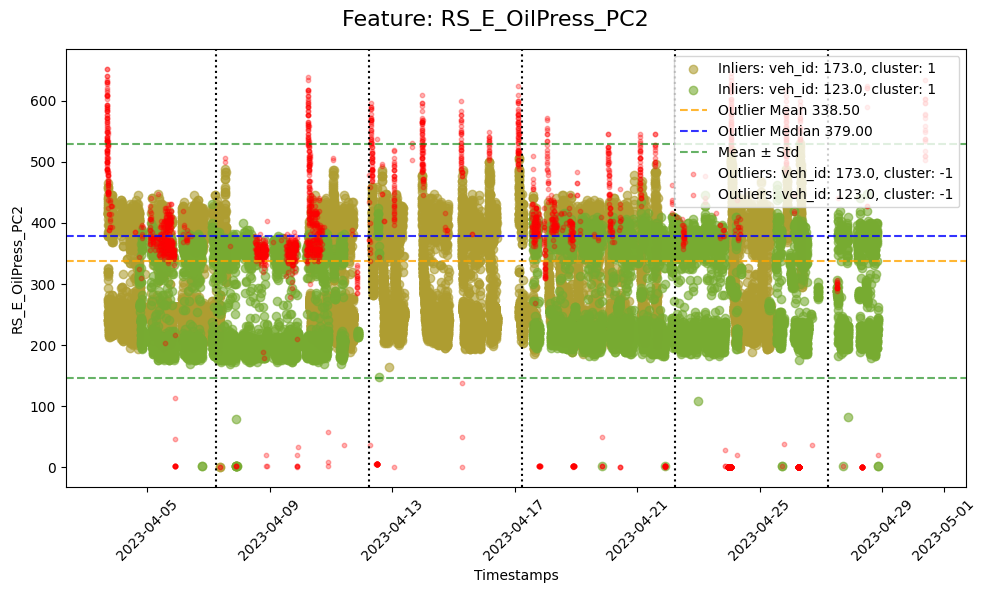

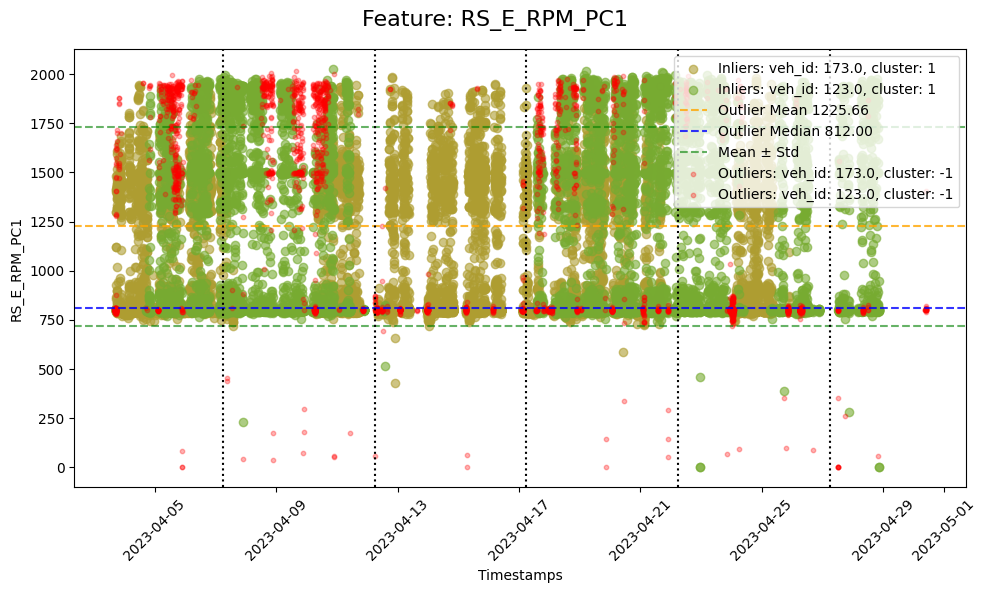

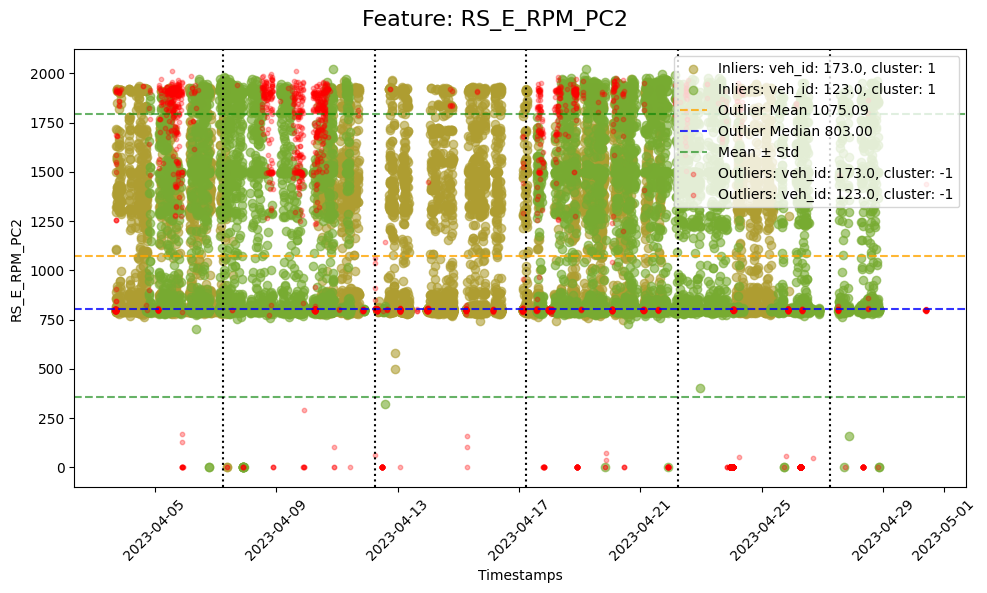

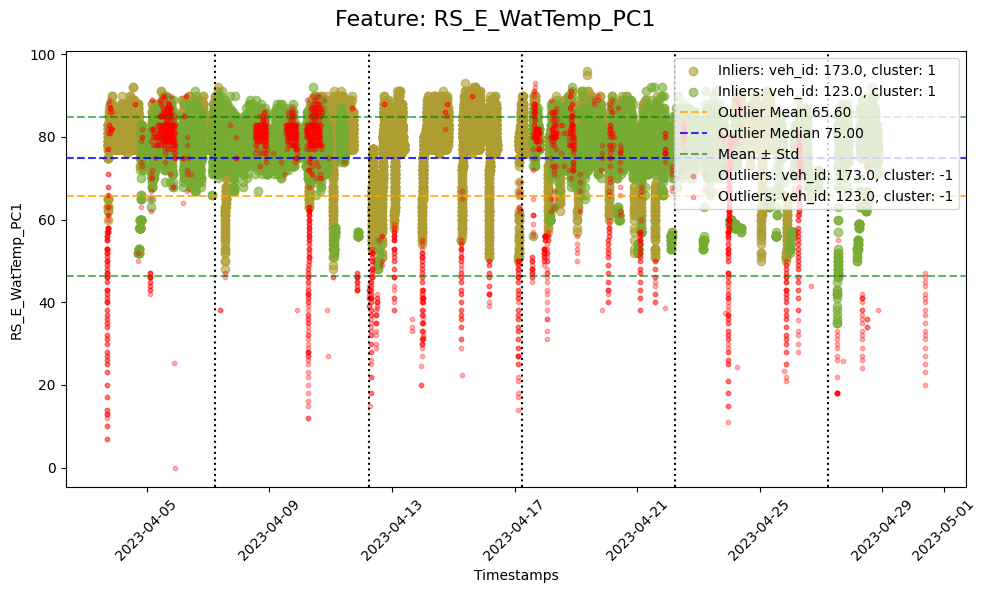

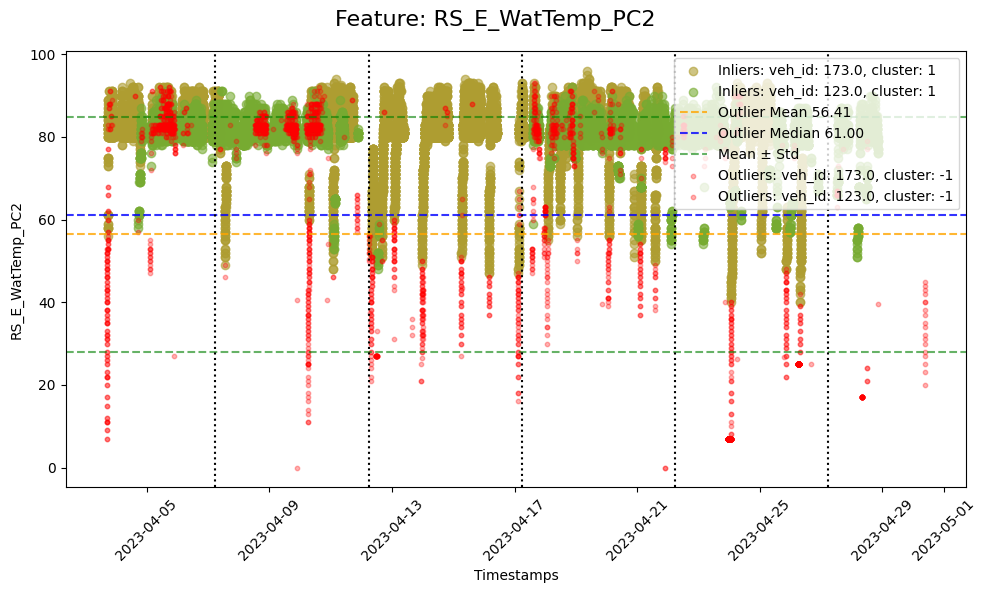

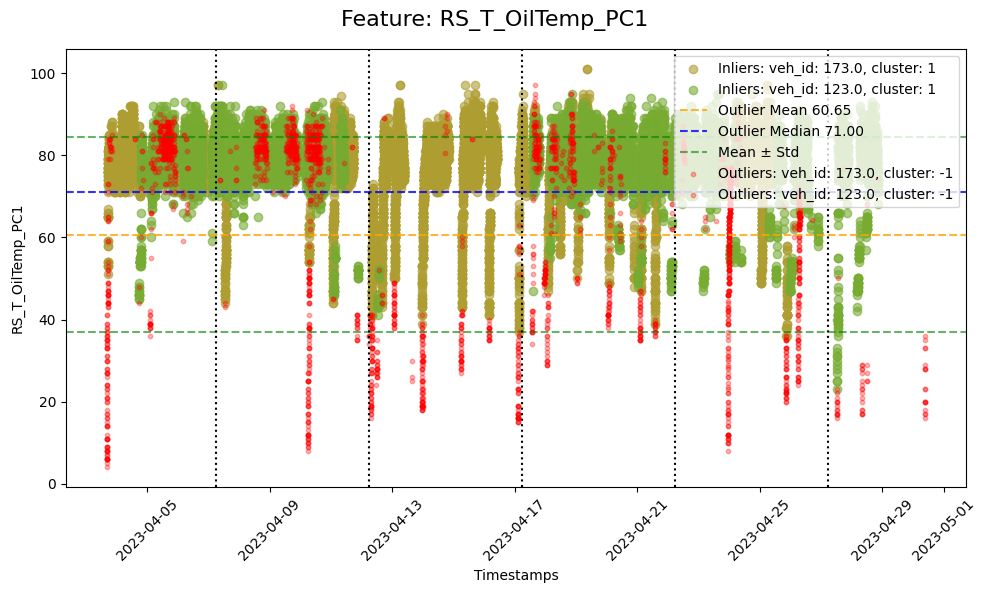

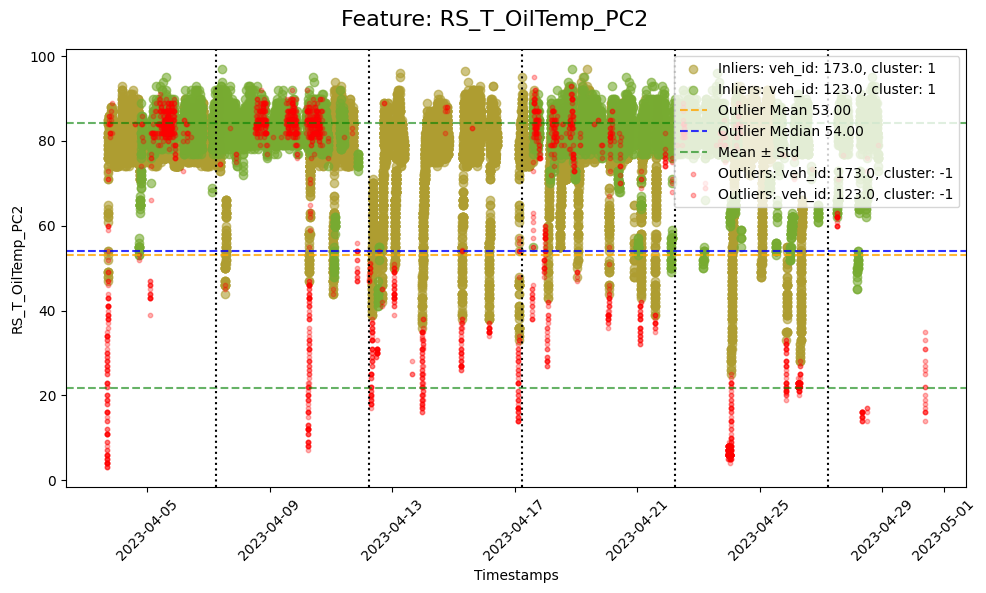

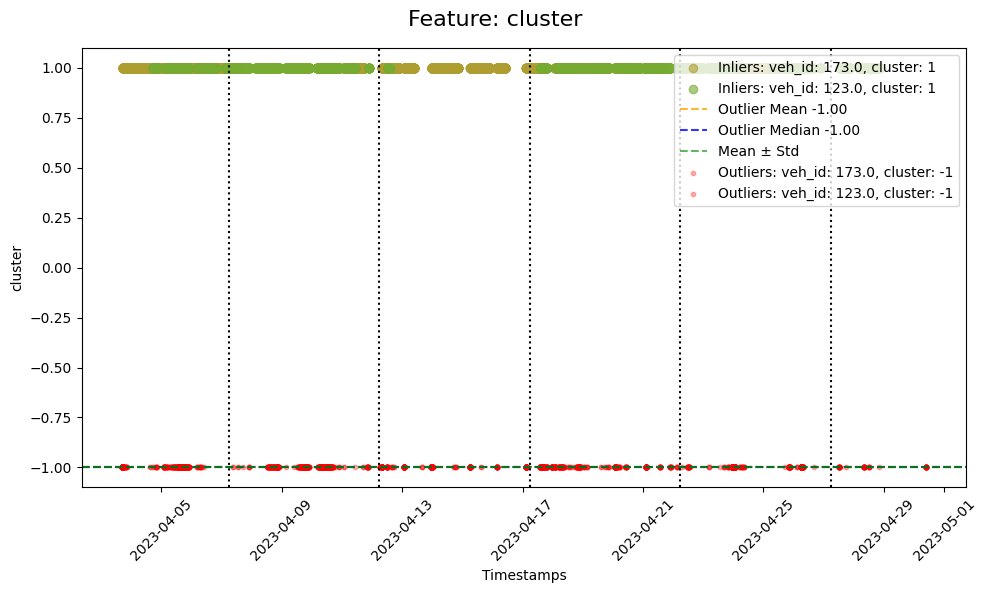

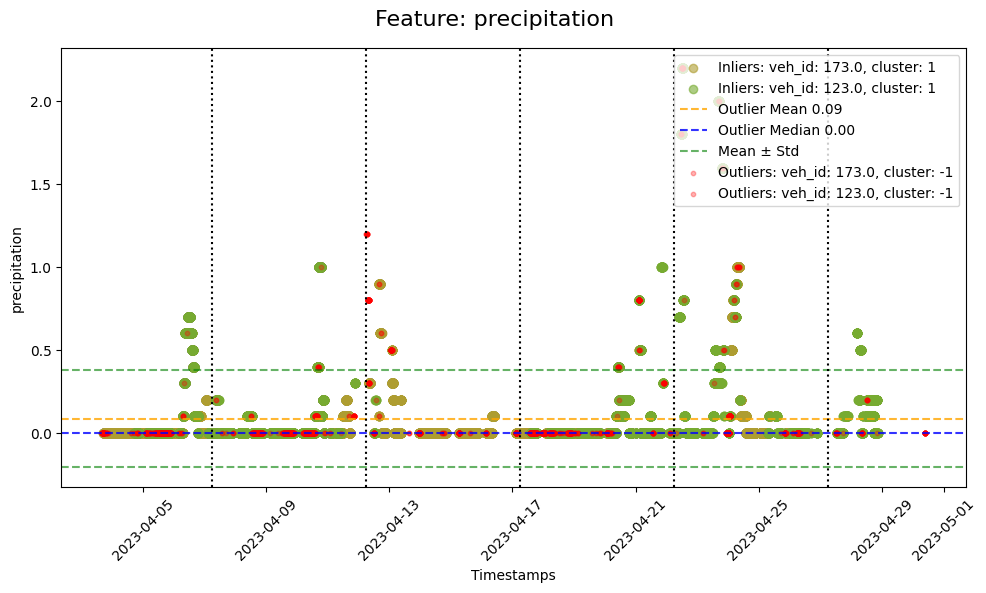

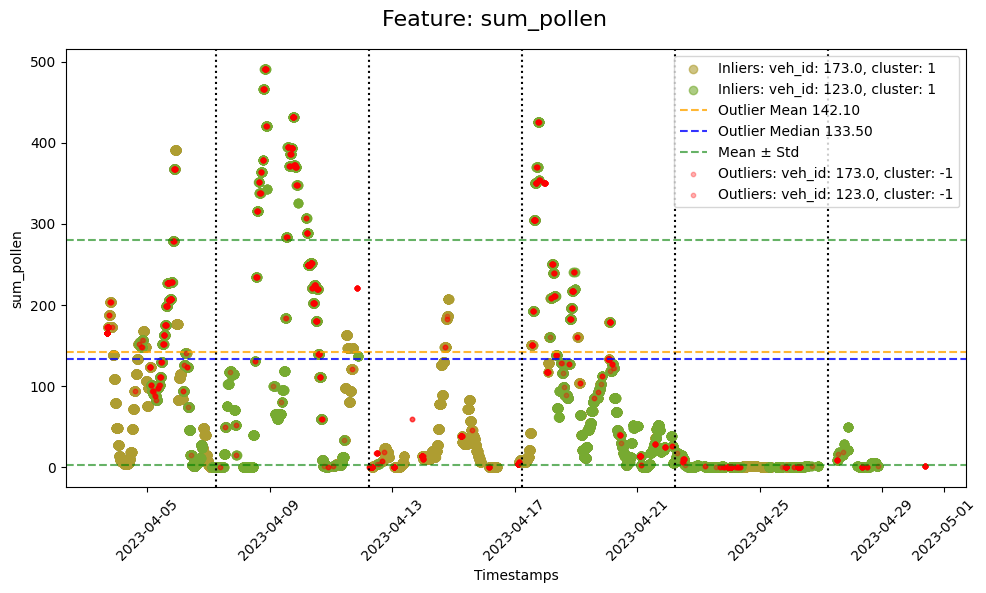

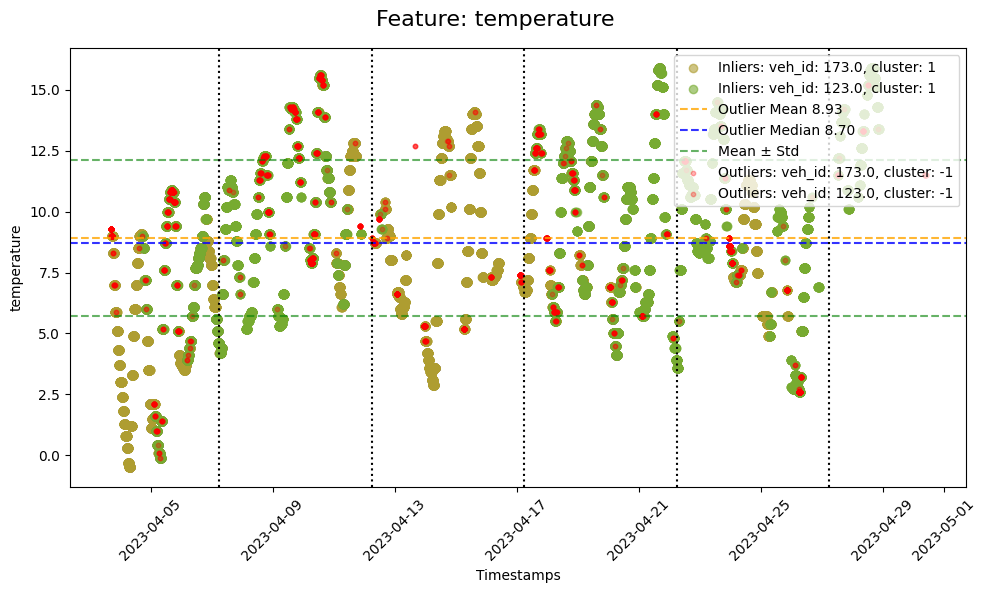

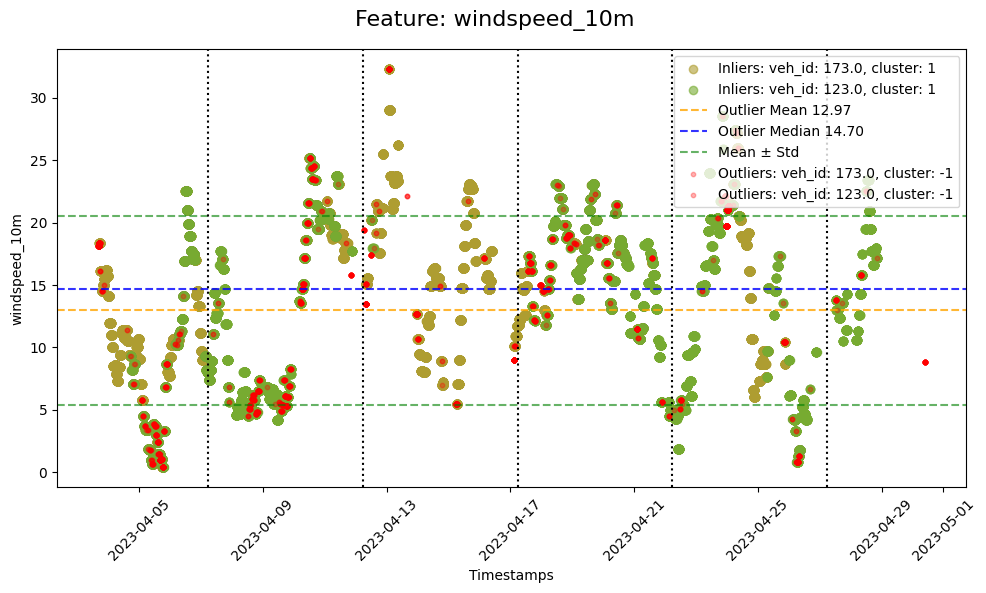

In [ ]:
for feature in unique_features:
    plot_veh_feature_for_all_dates(
        unique_dates, feature, data_within_date_range_with_feature_only_sampled, selected_vehicles
    )

## Analyze most and less Outlier based on one day

In [274]:
import pandas as pd


# Day with the most outliers and inliers by vehicle
most_outliers_day_vehicle = df[df["cluster"] == -1]
most_outliers_day_vehicle = most_outliers_day_vehicle.groupby(["mapped_veh_id", most_outliers_day_vehicle.index.date])[
    "cluster"
].size()
most_outliers_day_vehicle_idx = most_outliers_day_vehicle.idxmax()

least_outliers_day_vehicle = df[df["cluster"] == -1]
least_outliers_day_vehicle = least_outliers_day_vehicle.groupby(
    ["mapped_veh_id", least_outliers_day_vehicle.index.date]
)["cluster"].size()

least_outliers_day_vehicle_idx = least_outliers_day_vehicle.idxmin()

most_inliers_day_vehicle = df[df["cluster"] == 1]
most_inliers_day_vehicle = most_inliers_day_vehicle.groupby(["mapped_veh_id", most_inliers_day_vehicle.index.date])[
    "cluster"
].size()
most_inliers_day_vehicle = most_inliers_day_vehicle.idxmax()

least_inliers_day_vehicle = df[df["cluster"] == 1]
least_inliers_day_vehicle = least_inliers_day_vehicle.groupby(["mapped_veh_id", least_inliers_day_vehicle.index.date])[
    "cluster"
].size()
least_inliers_day_vehicle = least_inliers_day_vehicle.idxmin()

print(
    f"Day with the most outliers by vehicle: {most_outliers_day_vehicle_idx[1]} - {most_outliers_day_vehicle_idx[0]} - {most_outliers_day_vehicle.max()}"
)
print(
    f"Day with the least outliers by vehicle: {least_outliers_day_vehicle_idx[1]} - {least_outliers_day_vehicle_idx[0]} - {least_outliers_day_vehicle.min()}"
)
print(f"Day with the most inliers by vehicle: {most_inliers_day_vehicle[1]} - {most_inliers_day_vehicle[0]}")
print(f"Day with the least inliers by vehicle: {least_inliers_day_vehicle[1]} - {least_inliers_day_vehicle[0]}")

Day with the most outliers by vehicle: 2023-02-06 - 140.0 - 5441
Day with the least outliers by vehicle: 2023-05-26 - 102.0 - 1
Day with the most inliers by vehicle: 2023-01-31 - 114.0
Day with the least inliers by vehicle: 2023-07-30 - 102.0


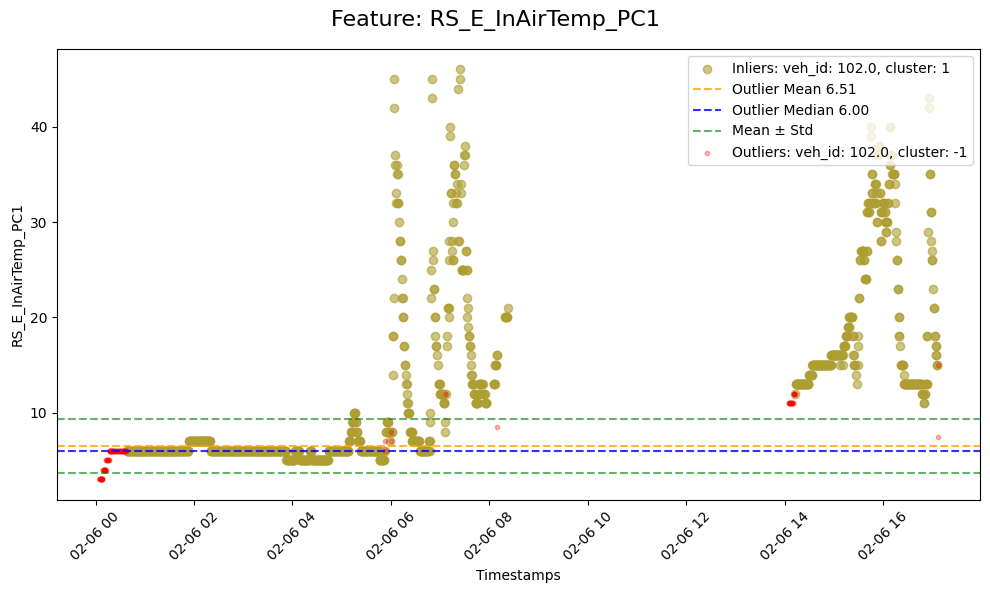

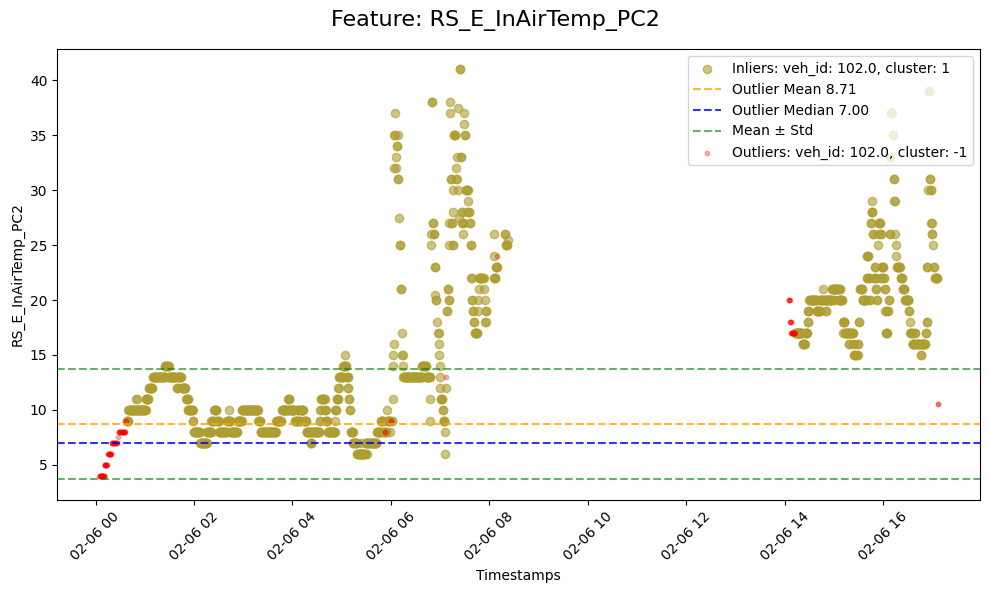

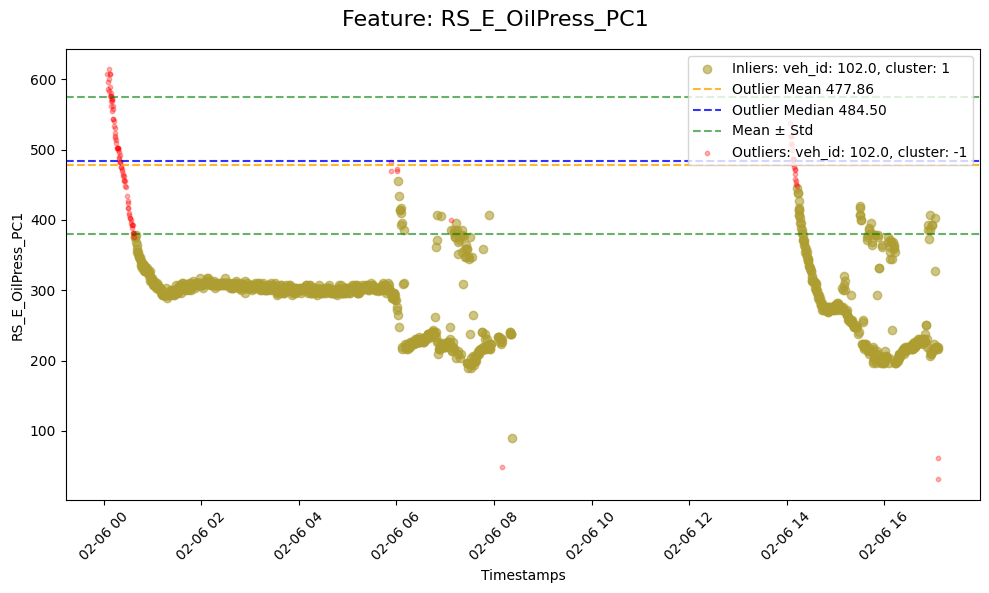

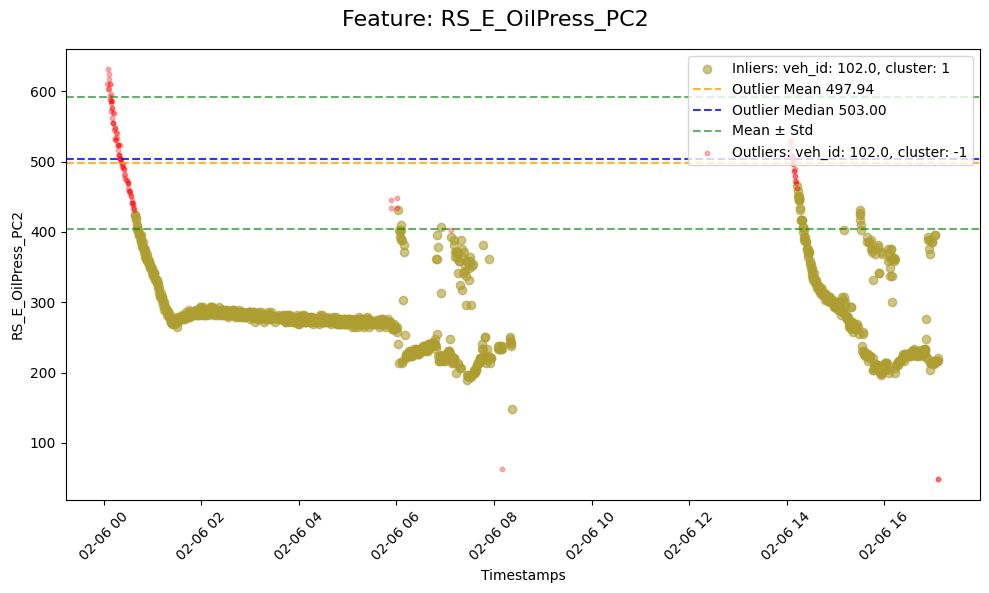

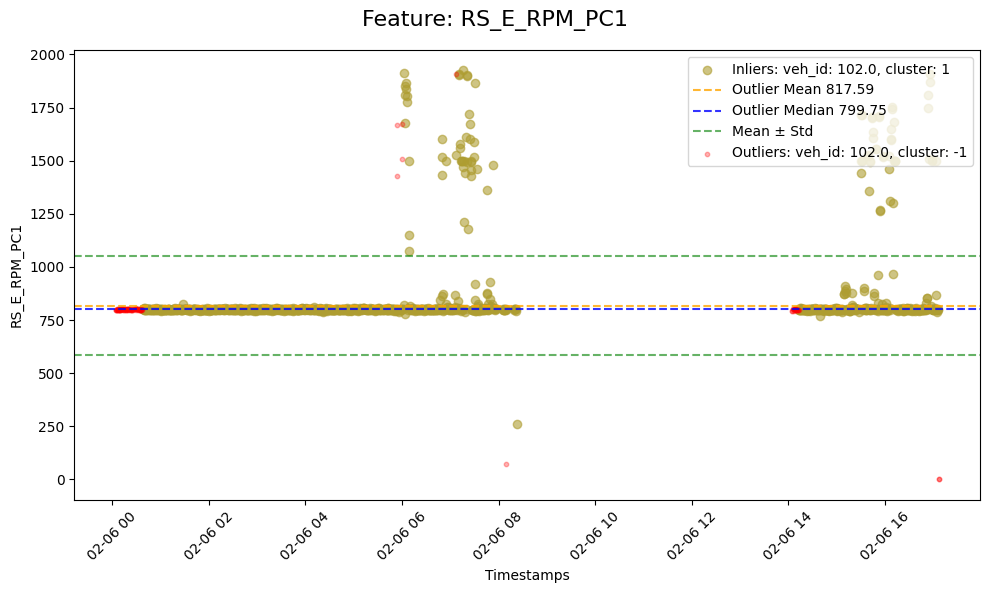

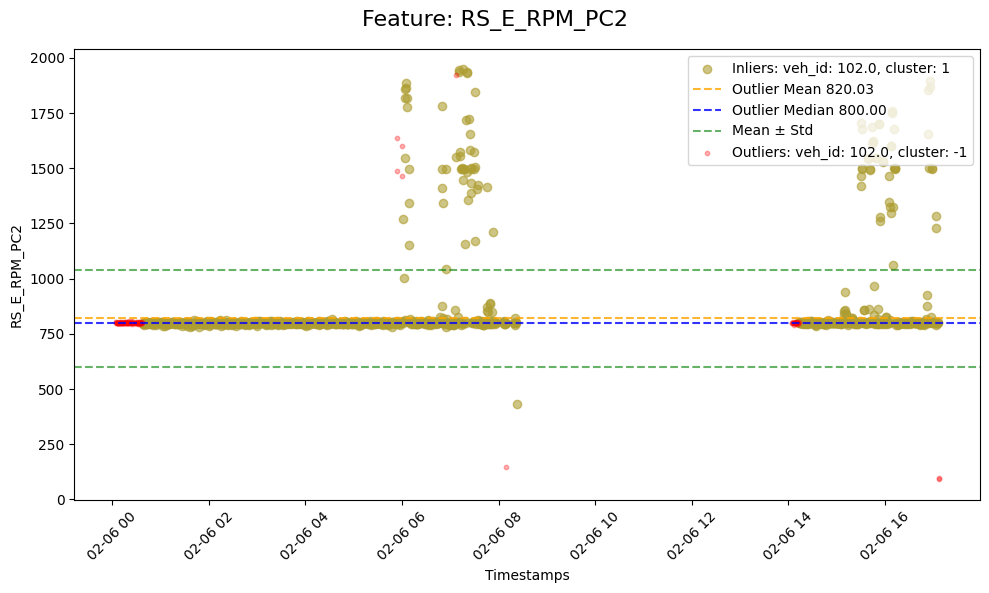

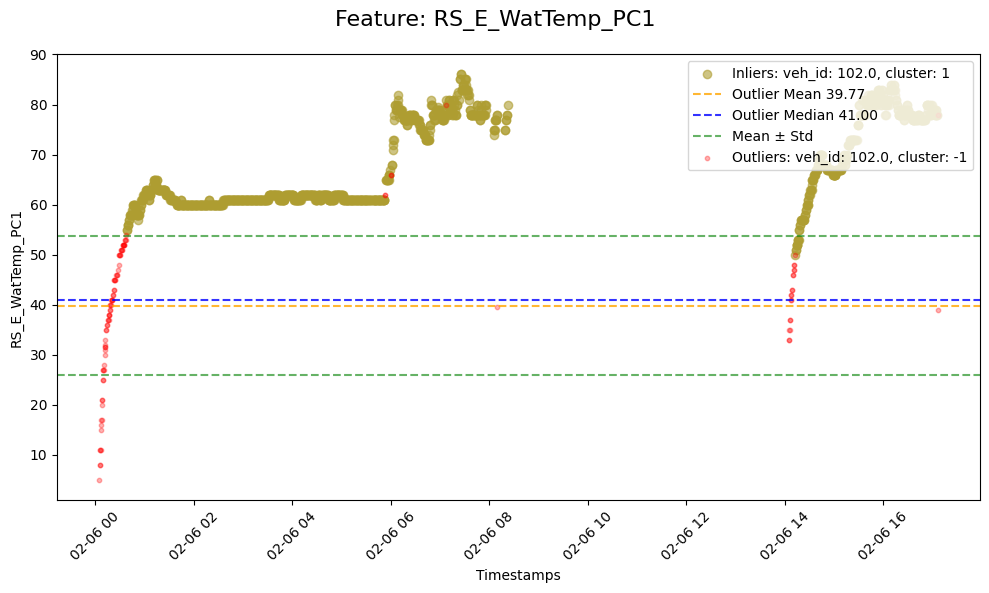

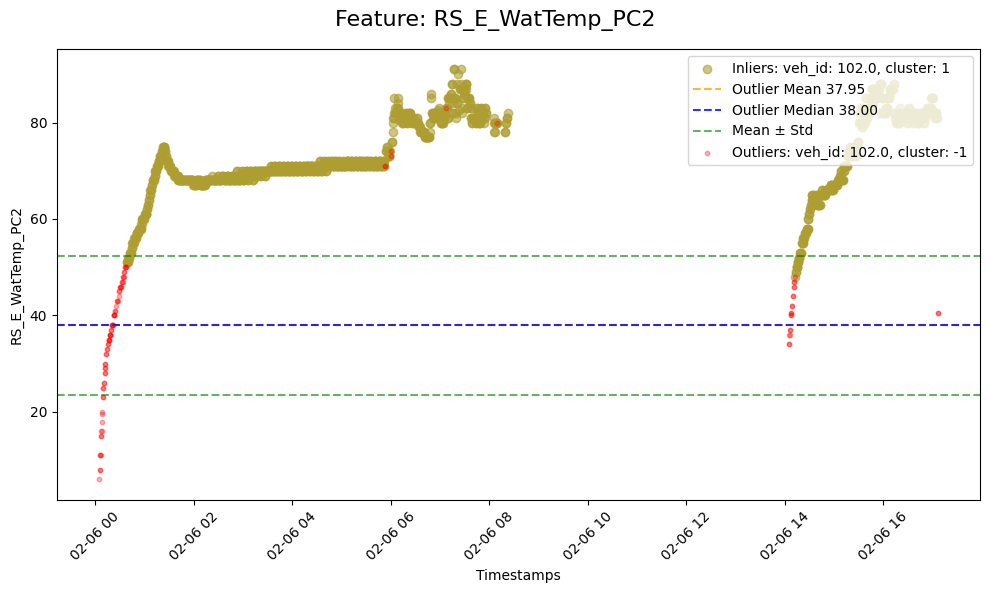

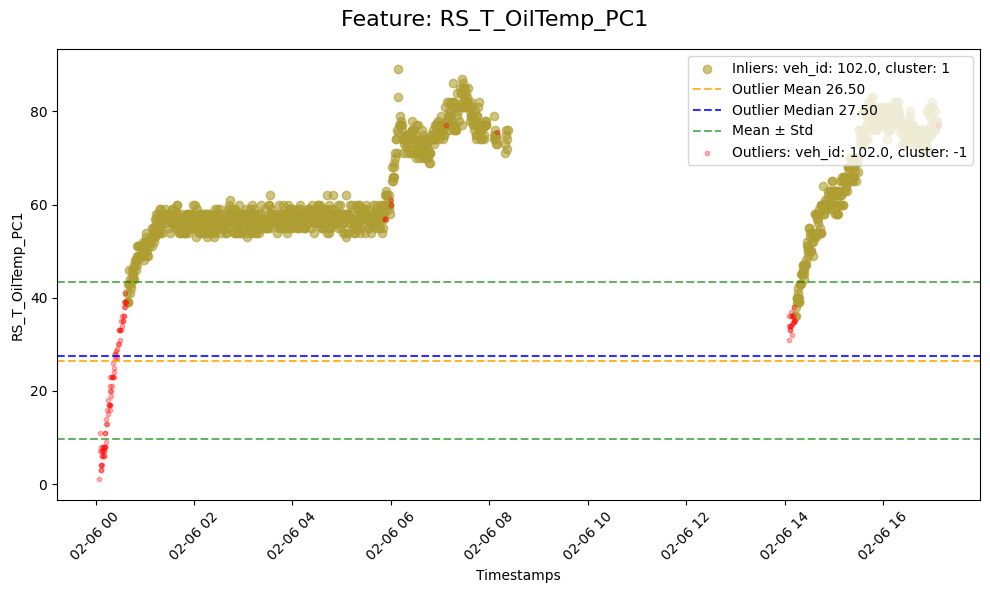

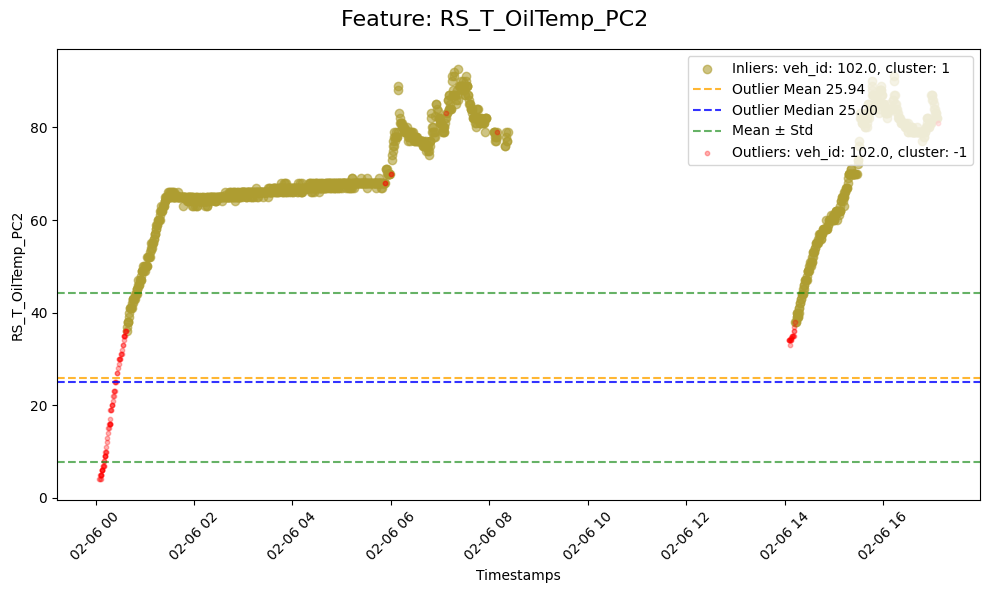

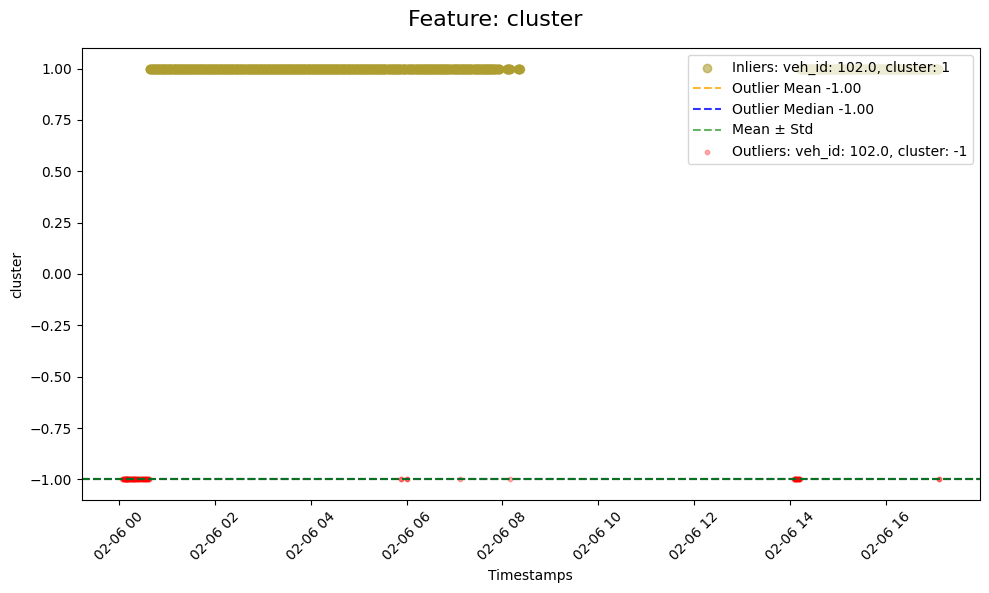

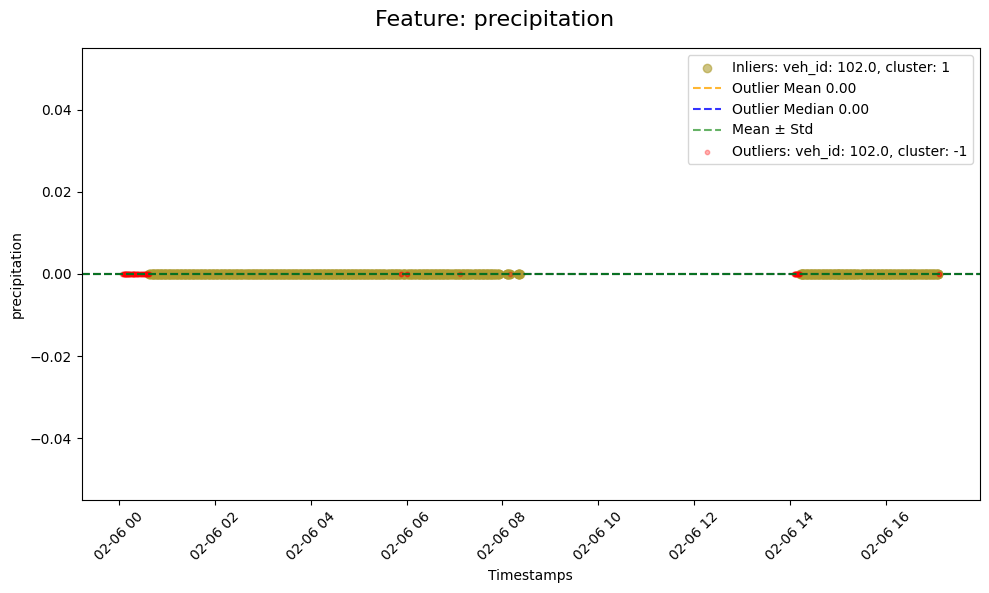

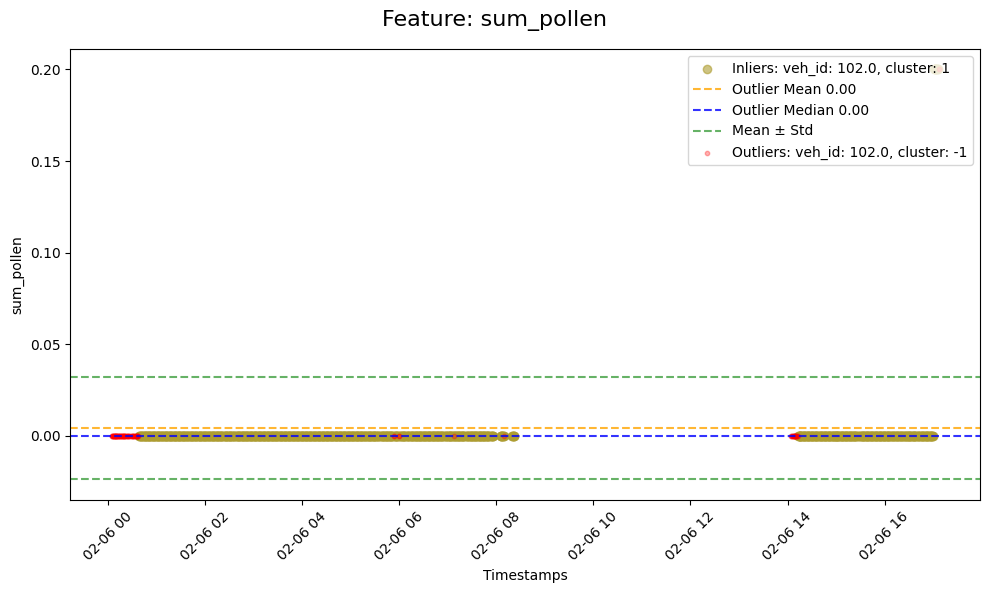

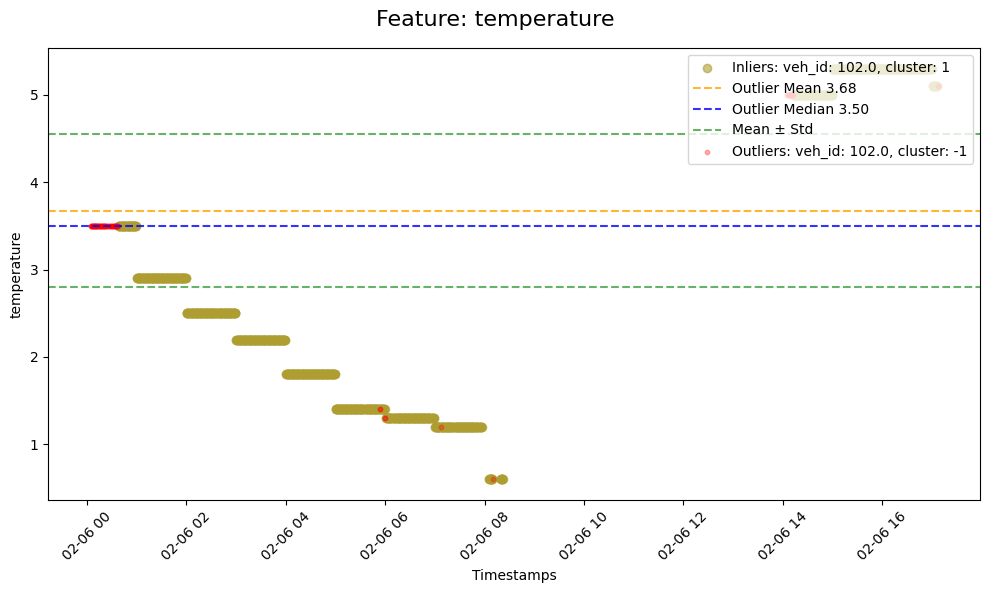

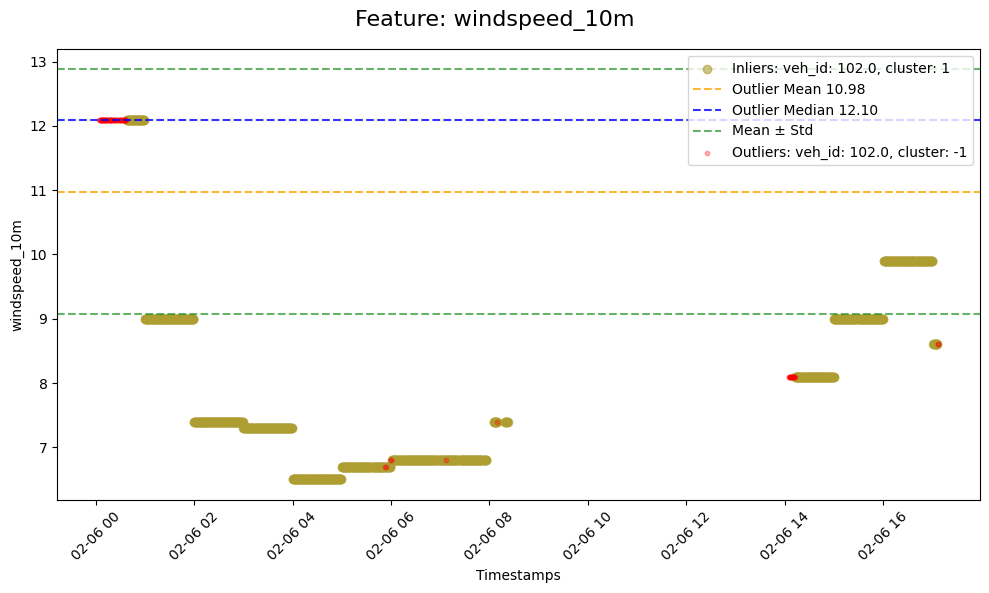

In [ ]:
specific_vehicle = least_outliers_day_vehicle.idxmin()[0]

sample_number = 1


selected_vehicles = [specific_vehicle]
data_within_date_range_with_feature_only_sampled = df[df["mapped_veh_id"].isin(selected_vehicles)]
data_within_date_range_with_feature_only_sampled = data_within_date_range_with_feature_only_sampled.loc[
    str(most_outliers_day_vehicle_idx[1])
]

for feature in unique_features:
    plot_veh_feature_for_all_dates(
        most_outliers_day_vehicle_idx[1],
        feature,
        data_within_date_range_with_feature_only_sampled,
        selected_vehicles,
        add_date_line=False,
    )

## Merge Isolation & Fuzzy

In [220]:
merged_df = pd.merge(
    df, df2[["cluster"]], left_index=True, right_index=True, suffixes=("_isolation_forest", "_mean_fuzzy_logic")
)
merged_df.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-01-01 03:23:06          114.0  51.190672  5.113057                16.0   
2023-01-01 12:12:32          187.0  51.009695  3.784659                16.0   
2023-01-01 12:12:34          187.0  51.009963  3.784156                15.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-01-01 03:23:06                21.0              365.0              369.0   
2023-01-01 12:12:32                18.0              320.0              307.0   
2023-01-01 12:12:34                18.0              317.0              300.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-01-01 03:23:06         799.0         802.0              57.0   
2023-01-01 12:12:32         798.0         801.0              70.0   
2023-01-01 12:12:34         798.0         802.0              70.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-01-01 03:23:06              58.0              52.0              53.0   
2023-01-01 12:12:32              67.0              61.0              55.0   
2023-01-01 12:12:34              67.0              60.0              57.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-01-01 03:23:06         14.8            0.0           36.5         0.0   
2023-01-01 12:12:32         13.4            0.0           21.3         0.0   
2023-01-01 12:12:34         13.4            0.0           21.3         0.0   

                     cluster_isolation_forest  cluster_mean_fuzzy_logic  
timestamps_UTC                                                           
2023-01-01 03:23:06                         1                         0  
2023-01-01 12:12:32                         1                         0  
2023-01-01 12:12:34                         1                         0

In [273]:
merged_df = merged_df[~merged_df.index.year.isin([2022])]

In [279]:
from pprint import pprint


def get_day_stats(df, cluster_column):
    cluster_types = df[cluster_column].unique()
    results = {}

    for cluster_type in cluster_types:
        df_cluster_type_one = df[df[cluster_column] == cluster_type]

        most_outliers_day_vehicle = df_cluster_type_one.groupby(["mapped_veh_id", df_cluster_type_one.index.date])[
            cluster_column
        ].size()

        most_outliers_day_vehicle_idx = most_outliers_day_vehicle.idxmax()

        results[
            f"most_of_cluster_{cluster_type}_day_vehicle"
        ] = f"Date: {most_outliers_day_vehicle_idx[1]} - Veh ID: {most_outliers_day_vehicle_idx[0]} - Value: {most_outliers_day_vehicle.max()}"

        least_outliers_day_vehicle = df_cluster_type_one.groupby(["mapped_veh_id", df_cluster_type_one.index.date])[
            cluster_column
        ].size()
        least_outliers_day_vehicle_idx = least_outliers_day_vehicle.idxmin()

        results[
            f"least_of_cluster_{cluster_type}_day_vehicle"
        ] = f"Date:{least_outliers_day_vehicle_idx[1]} - Veh ID: {least_outliers_day_vehicle_idx[0]} - Value: {least_outliers_day_vehicle.min()}"

    return results


# Call the function for cluster_isolation_forest
stats_isolation_forest = get_day_stats(merged_df, "cluster_isolation_forest")
print("Stats for Cluster Isolation Forest:")
pprint(stats_isolation_forest)

# Call the function for cluster_mean_fuzzy_logic
stats_mean_fuzzy_logic = get_day_stats(merged_df, "cluster_mean_fuzzy_logic")
print("\nStats for Cluster Mean Fuzzy Logic:")
pprint(stats_mean_fuzzy_logic)

Stats for Cluster Isolation Forest:
{'least_of_cluster-1_day_vehicle': '2023-06-06 - 104.0 - 1',
 'least_of_cluster1_day_vehicle': '2023-05-11 - 103.0 - 1',
 'most_of_cluster-1_day_vehicle': '2023-02-06 - 140.0 - 11643',
 'most_of_cluster1_day_vehicle': '2023-01-31 - 114.0 - 27939'}

Stats for Cluster Mean Fuzzy Logic:
{'least_of_cluster0_day_vehicle': '2023-01-01 - 114.0 - 1',
 'least_of_cluster1_day_vehicle': '2023-03-12 - 102.0 - 1',
 'most_of_cluster0_day_vehicle': '2023-01-31 - 114.0 - 25122',
 'most_of_cluster1_day_vehicle': '2023-02-10 - 114.0 - 4375'}


In [287]:
# (montant2 - montant1) ÷ montant1 × 100 = pourcentage de la variation
(27939 - 25122) / 27939 *100

10.08268012455707

Le max :  2023-09


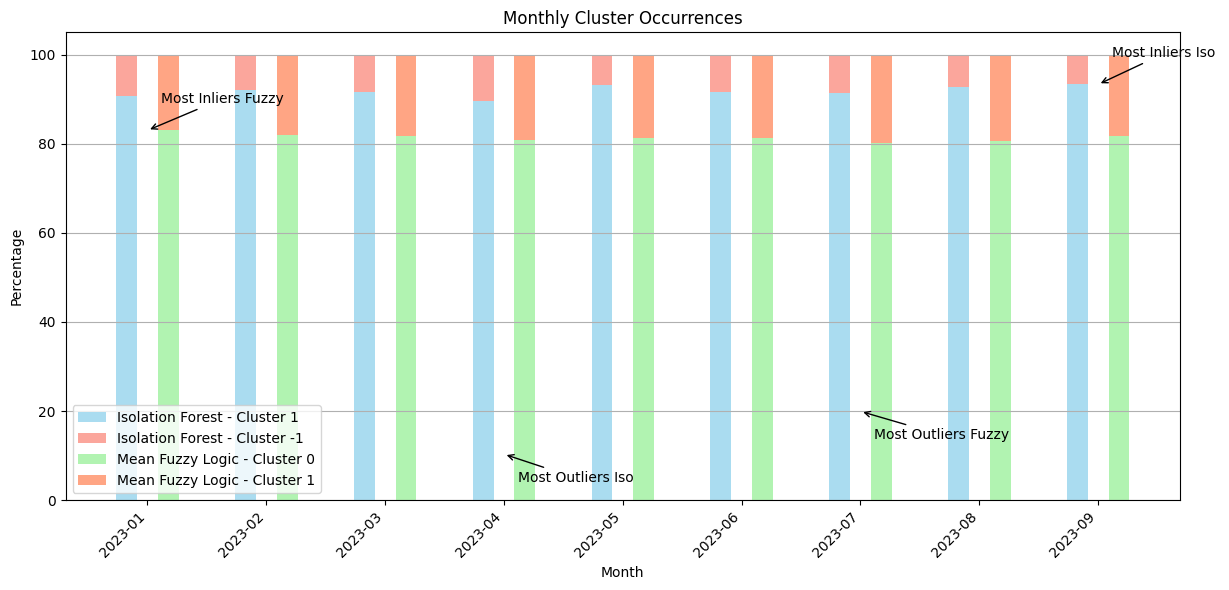

In [320]:
import seaborn as sns


def plot_monthly_cluster_percentages(df):
    monthly_clusters_iso = (
        df.groupby([df.index.to_period("M"), "cluster_isolation_forest"]).size().unstack(fill_value=0)
    )
    monthly_percentages_iso = monthly_clusters_iso.div(monthly_clusters_iso.sum(axis=1), axis=0) * 100
    monthly_percentages_iso = monthly_percentages_iso.round(2)

    monthly_clusters_mean = (
        df.groupby([df.index.to_period("M"), "cluster_mean_fuzzy_logic"]).size().unstack(fill_value=0)
    )
    monthly_percentages_mean = monthly_clusters_mean.div(monthly_clusters_mean.sum(axis=1), axis=0) * 100
    monthly_percentages_mean = monthly_percentages_mean.round(2)

    max_cluster_1_month_iso = monthly_percentages_iso[1].idxmax()
    print("Le max : ", monthly_percentages_iso[1].idxmax())
    max_cluster_neg1_month_iso = monthly_percentages_iso[-1].idxmax()

    max_cluster_0_month_mean = monthly_percentages_mean[0].idxmax()
    max_cluster_1_month_mean = monthly_percentages_mean[1].idxmax()

    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.35
    x = np.arange(len(monthly_percentages_iso.index))  # Use numpy array for better control of positions

    # Plotting Isolation Forest clusters
    ax.bar(
        x - bar_width / 2,
        monthly_percentages_iso[1],
        width=bar_width / 2,
        color="skyblue",
        alpha=0.7,
        label="Isolation Forest - Cluster 1",
    )
    ax.bar(
        x - bar_width / 2,
        monthly_percentages_iso[-1],
        width=bar_width / 2,
        color="salmon",
        alpha=0.7,
        bottom=monthly_percentages_iso[1],
        label="Isolation Forest - Cluster -1",
    )

    # Plotting Mean Fuzzy Logic clusters
    ax.bar(
        x + bar_width / 2,
        monthly_percentages_mean[0],
        width=bar_width / 2,
        color="lightgreen",
        alpha=0.7,
        label="Mean Fuzzy Logic - Cluster 0",
    )
    ax.bar(
        x + bar_width / 2,
        monthly_percentages_mean[1],
        width=bar_width / 2,
        color="coral",
        alpha=0.7,
        bottom=monthly_percentages_mean[0],
        label="Mean Fuzzy Logic - Cluster 1",
    )

    ax.set_xlabel("Month")
    ax.set_ylabel("Percentage")
    ax.set_title("Monthly Cluster Occurrences")
    ax.legend()
    ax.grid(axis="y")

    plt.xticks(x, monthly_percentages_iso.index.strftime("%Y-%m"), rotation=45, ha="right")
    plt.tight_layout()

    ax.annotate(
        "Most Inliers Iso ",
        (x[max_cluster_1_month_iso.month - 1], monthly_percentages_iso.loc[max_cluster_1_month_iso][1]),
        xytext=(10, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.annotate(
        "Most Outliers Iso",
        (x[max_cluster_neg1_month_iso.month - 1], monthly_percentages_iso.loc[max_cluster_neg1_month_iso, -1]),
        xytext=(10, -20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    # Annotate months with the most occurrences of clusters for Mean Fuzzy Logic
    ax.annotate(
        "Most Inliers Fuzzy",
        (x[max_cluster_0_month_mean.month - 1], monthly_percentages_mean.loc[max_cluster_0_month_mean, 0]),
        xytext=(10, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.annotate(
        "Most Outliers Fuzzy",
        (x[max_cluster_1_month_mean.month - 1], monthly_percentages_mean.loc[max_cluster_1_month_mean, 1]),
        xytext=(10, -20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    plt.show()


# Assuming merged_df is your DataFrame with a date index and the cluster columns
plot_monthly_cluster_percentages(merged_df)

In [321]:
merged_df.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-01-01 03:23:06          114.0  51.190672  5.113057                16.0   
2023-01-01 12:12:32          187.0  51.009695  3.784659                16.0   
2023-01-01 12:12:34          187.0  51.009963  3.784156                15.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-01-01 03:23:06                21.0              365.0              369.0   
2023-01-01 12:12:32                18.0              320.0              307.0   
2023-01-01 12:12:34                18.0              317.0              300.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-01-01 03:23:06         799.0         802.0              57.0   
2023-01-01 12:12:32         798.0         801.0              70.0   
2023-01-01 12:12:34         798.0         802.0              70.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-01-01 03:23:06              58.0              52.0              53.0   
2023-01-01 12:12:32              67.0              61.0              55.0   
2023-01-01 12:12:34              67.0              60.0              57.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-01-01 03:23:06         14.8            0.0           36.5         0.0   
2023-01-01 12:12:32         13.4            0.0           21.3         0.0   
2023-01-01 12:12:34         13.4            0.0           21.3         0.0   

                     cluster_isolation_forest  cluster_mean_fuzzy_logic  
timestamps_UTC                                                           
2023-01-01 03:23:06                         1                         0  
2023-01-01 12:12:32                         1                         0  
2023-01-01 12:12:34                         1                         0

## New Columns Combination of Cluster

In [343]:
merged_df["combined_cluster"] = 1  # Initialize with default value 1

# Update 'final_cluster' based on specified conditions
merged_df.loc[
    (merged_df["cluster_isolation_forest"] == -1) & (merged_df["cluster_mean_fuzzy_logic"] == 1), "combined_cluster"
] = -1

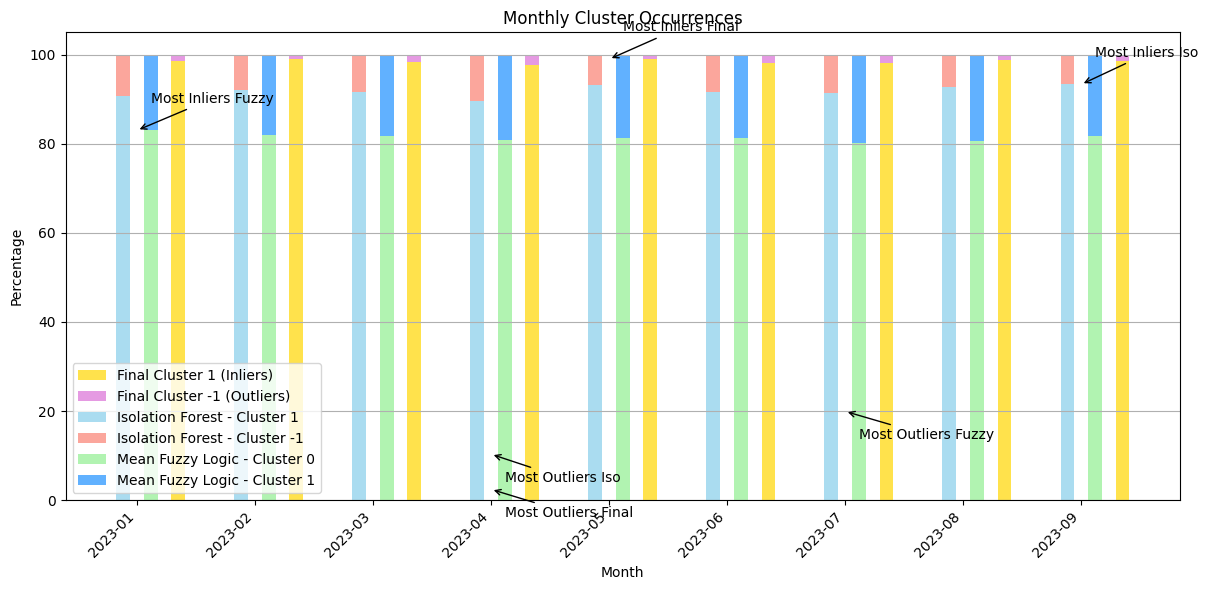

In [345]:
import seaborn as sns


def plot_monthly_cluster_percentages(df):
    monthly_clusters_iso = (
        df.groupby([df.index.to_period("M"), "cluster_isolation_forest"]).size().unstack(fill_value=0)
    )
    monthly_percentages_iso = monthly_clusters_iso.div(monthly_clusters_iso.sum(axis=1), axis=0) * 100
    monthly_percentages_iso = monthly_percentages_iso.round(2)

    monthly_clusters_mean = (
        df.groupby([df.index.to_period("M"), "cluster_mean_fuzzy_logic"]).size().unstack(fill_value=None)
    )
    monthly_percentages_mean = monthly_clusters_mean.div(monthly_clusters_mean.sum(axis=1), axis=0) * 100
    monthly_percentages_mean = monthly_percentages_mean.round(2)

    max_cluster_1_month_iso = monthly_percentages_iso[1].idxmax()
    max_cluster_neg1_month_iso = monthly_percentages_iso[-1].idxmax()

    max_cluster_0_month_mean = monthly_percentages_mean[0].idxmax()
    max_cluster_1_month_mean = monthly_percentages_mean[1].idxmax()

    fig, ax = plt.subplots(figsize=(12, 6))

    bar_width = 0.35
    x = np.arange(len(monthly_percentages_iso.index))  # Use numpy array for better control of positions

    final_clusters = df.groupby([df.index.to_period("M"), "combined_cluster"]).size().unstack(fill_value=0)
    final_percentages = final_clusters.div(final_clusters.sum(axis=1), axis=0) * 100
    final_percentages = final_percentages.round(2)

    max_outliers_month_final = final_percentages[-1].idxmax()
    max_inliers_month_final = final_percentages[1].idxmax()

    # Plotting Final Cluster column
    ax.bar(
        x + bar_width,
        final_percentages[1],
        width=bar_width / 3,
        color="gold",
        alpha=0.7,
        label="Final Cluster 1 (Inliers)",
    )
    ax.bar(
        x + bar_width,
        final_percentages[-1],
        width=bar_width / 3,
        color="orchid",
        alpha=0.7,
        bottom=final_percentages[1],
        label="Final Cluster -1 (Outliers)",
    )

    # Annotate months with the most occurrences of clusters for Final Cluster
    ax.annotate(
        "Most Outliers Final",
        (x[max_outliers_month_final.month - 1], final_percentages.loc[max_outliers_month_final, -1]),
        xytext=(10, -20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.annotate(
        "Most Inliers Final",
        (x[max_inliers_month_final.month - 1], final_percentages.loc[max_inliers_month_final, 1]),
        xytext=(10, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    # Plotting Isolation Forest clusters
    ax.bar(
        x - bar_width / 3,
        monthly_percentages_iso[1],
        width=bar_width / 3,
        color="skyblue",
        alpha=0.7,
        label="Isolation Forest - Cluster 1",
    )
    ax.bar(
        x - bar_width / 3,
        monthly_percentages_iso[-1],
        width=bar_width / 3,
        color="salmon",
        alpha=0.7,
        bottom=monthly_percentages_iso[1],
        label="Isolation Forest - Cluster -1",
    )

    # Plotting Mean Fuzzy Logic clusters
    ax.bar(
        x + bar_width / 3,
        monthly_percentages_mean[0],
        width=bar_width / 3,
        color="lightgreen",
        alpha=0.7,
        label="Mean Fuzzy Logic - Cluster 0",
    )
    ax.bar(
        x + bar_width / 3,
        monthly_percentages_mean[1],
        width=bar_width / 3,
        color="dodgerblue",
        alpha=0.7,
        bottom=monthly_percentages_mean[0],
        label="Mean Fuzzy Logic - Cluster 1",
    )

    ax.set_xlabel("Month")
    ax.set_ylabel("Percentage")
    ax.set_title("Monthly Cluster Occurrences")
    ax.legend()
    ax.grid(axis="y")

    plt.xticks(x, monthly_percentages_iso.index.strftime("%Y-%m"), rotation=45, ha="right")
    plt.tight_layout()

    ax.annotate(
        "Most Inliers Iso ",
        (x[max_cluster_1_month_iso.month - 1], monthly_percentages_iso.loc[max_cluster_1_month_iso][1]),
        xytext=(10, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.annotate(
        "Most Outliers Iso",
        (x[max_cluster_neg1_month_iso.month - 1], monthly_percentages_iso.loc[max_cluster_neg1_month_iso, -1]),
        xytext=(10, -20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    # Annotate months with the most occurrences of clusters for Mean Fuzzy Logic
    ax.annotate(
        "Most Inliers Fuzzy",
        (x[max_cluster_0_month_mean.month - 1], monthly_percentages_mean.loc[max_cluster_0_month_mean, 0]),
        xytext=(10, 20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    ax.annotate(
        "Most Outliers Fuzzy",
        (x[max_cluster_1_month_mean.month - 1], monthly_percentages_mean.loc[max_cluster_1_month_mean, 1]),
        xytext=(10, -20),
        textcoords="offset points",
        arrowprops=dict(arrowstyle="->"),
    )

    plt.show()


# Assuming merged_df is your DataFrame with a date index and the cluster columns including 'combined_cluster'
plot_monthly_cluster_percentages(merged_df)

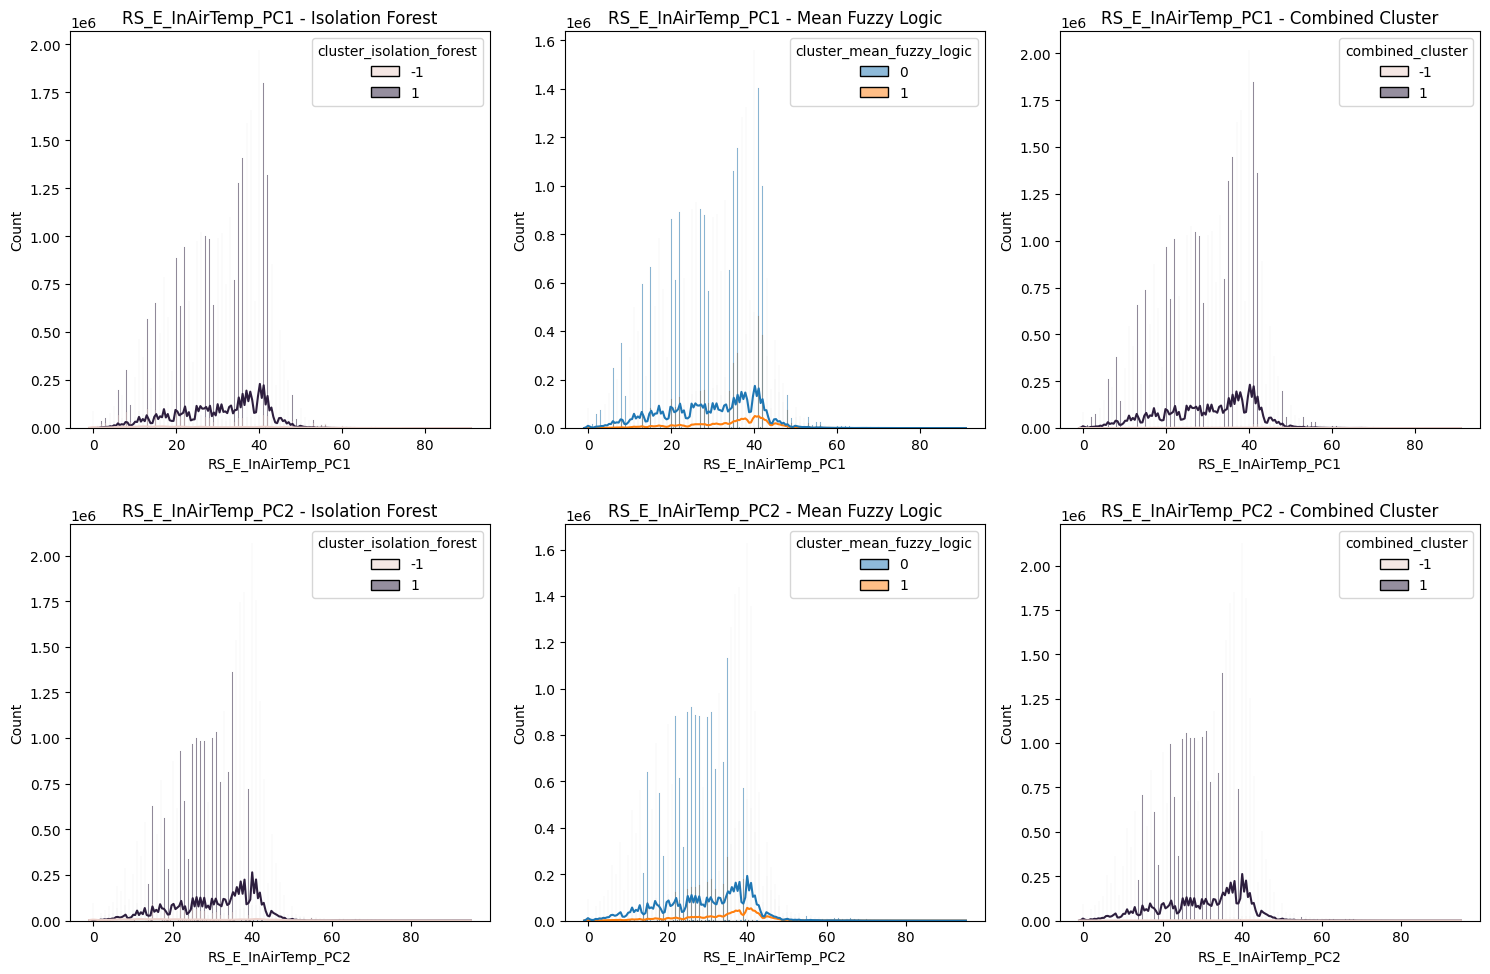

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

features_list = [
    "RS_E_InAirTemp_PC1",
    "RS_E_InAirTemp_PC2",
    # "RS_E_OilPress_PC1",
    # "RS_E_OilPress_PC2",
    # "RS_E_RPM_PC1",
    # "RS_E_RPM_PC2",
    # "RS_E_WatTemp_PC1",
    # "RS_E_WatTemp_PC2",
    # "RS_T_OilTemp_PC1",
    # "RS_T_OilTemp_PC2",
    # "temperature",
    # "precipitation",
    # "windspeed_10m",
    # "sum_pollen",
]

# Create subplots for each feature
fig, axes = plt.subplots(len(features_list), 3, figsize=(15, 5 * len(features_list)))

for i, feature in enumerate(features_list):
    # Distribution plot for Isolation Forest cluster
    sns.histplot(data=merged_df, x=feature, hue="cluster_isolation_forest", kde=True, ax=axes[i][0])
    axes[i][0].set_title(f"{feature} - Isolation Forest")

    # Distribution plot for Mean Fuzzy Logic cluster
    sns.histplot(data=merged_df, x=feature, hue="cluster_mean_fuzzy_logic", kde=True, ax=axes[i][1])
    axes[i][1].set_title(f"{feature} - Mean Fuzzy Logic")

    # Distribution plot for Combined Cluster
    sns.histplot(data=merged_df, x=feature, hue="combined_cluster", kde=True, ax=axes[i][2])
    axes[i][2].set_title(f"{feature} - Combined Cluster")

plt.tight_layout()
plt.show()

## Analyze Value Exceeding threshold


In [362]:
merged_df.head(3)

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-01-01 03:23:06          114.0  51.190672  5.113057                16.0   
2023-01-01 12:12:32          187.0  51.009695  3.784659                16.0   
2023-01-01 12:12:34          187.0  51.009963  3.784156                15.0   

                     RS_E_InAirTemp_PC2  RS_E_OilPress_PC1  RS_E_OilPress_PC2  \
timestamps_UTC                                                                  
2023-01-01 03:23:06                21.0              365.0              369.0   
2023-01-01 12:12:32                18.0              320.0              307.0   
2023-01-01 12:12:34                18.0              317.0              300.0   

                     RS_E_RPM_PC1  RS_E_RPM_PC2  RS_E_WatTemp_PC1  \
timestamps_UTC                                                      
2023-01-01 03:23:06         799.0         802.0              57.0   
2023-01-01 12:12:32         798.0         801.0              70.0   
2023-01-01 12:12:34         798.0         802.0              70.0   

                     RS_E_WatTemp_PC2  RS_T_OilTemp_PC1  RS_T_OilTemp_PC2  \
timestamps_UTC                                                              
2023-01-01 03:23:06              58.0              52.0              53.0   
2023-01-01 12:12:32              67.0              61.0              55.0   
2023-01-01 12:12:34              67.0              60.0              57.0   

                     temperature  precipitation  windspeed_10m  sum_pollen  \
timestamps_UTC                                                               
2023-01-01 03:23:06         14.8            0.0           36.5         0.0   
2023-01-01 12:12:32         13.4            0.0           21.3         0.0   
2023-01-01 12:12:34         13.4            0.0           21.3         0.0   

                     cluster_isolation_forest  cluster_mean_fuzzy_logic  \
timestamps_UTC                                                            
2023-01-01 03:23:06                         1                         0   
2023-01-01 12:12:32                         1                         0   
2023-01-01 12:12:34                         1                         0   

                     combined_cluster  
timestamps_UTC                         
2023-01-01 03:23:06                 1  
2023-01-01 12:12:32                 1  
2023-01-01 12:12:34                 1

In [368]:
print(merged_df["mapped_veh_id"].value_counts())

172.0    770084
136.0    711779
186.0    682695
177.0    657816
145.0    580380
          ...  
107.0    162987
123.0    150258
105.0    106633
179.0     89543
127.0     33067
Name: mapped_veh_id, Length: 92, dtype: int64


In [365]:
merged_df.loc[
    (
        ((merged_df["RS_E_InAirTemp_PC1"] > 65) | (merged_df["RS_E_InAirTemp_PC2"] > 65))
        & ((merged_df["RS_T_OilTemp_PC1"] > 115) | (merged_df["RS_T_OilTemp_PC2"] > 115))
        & ((merged_df["RS_E_WatTemp_PC1"] > 100) | (merged_df["RS_E_WatTemp_PC2"] > 100))
        & (merged_df["mapped_veh_id"] == 123)
    )
]

mapped_veh_id        lat       lon  RS_E_InAirTemp_PC1  \
timestamps_UTC                                                                
2023-05-13 14:11:23          123.0  50.990070  5.348795                47.0   
2023-05-13 14:11:23          123.0  50.990070  5.348795                47.0   
2023-05-13 14:11:23          123.0  50.990070  5.348795                47.0   
2023-05-13 14:12:07          123.0  50.989997  5.348778                48.0   
2023-05-13 14:12:07          123.0  50.989997  5.348778                48.0   
2023-05-13 14:13:08          123.0  50.984188  5.349095                51.0   
2023-05-13 14:13:08          123.0  50.984188  5.349095                51.0   
2023-05-13 14:14:08          123.0  50.972414  5.345701                57.0   
2023-05-13 14:14:08          123.0  50.972414  5.345701                57.0   
2023-05-13 14:14:17          123.0  50.970327  5.344928                54.0   
2023-05-13 14:14:17          123.0  50.970327  5.344928                54.0   
2023-05-13 14:15:07          123.0  50.959800  5.339632                52.0   
2023-05-13 14:15:07          123.0  50.959800  5.339632                52.0   
2023-05-13 14:15:07          123.0  50.959800  5.339632                52.0   
2023-05-13 14:15:07          123.0  50.959800  5.339632                52.0   
2023-05-13 14:15:07          123.0  50.959800  5.339632                52.0   
2023-05-13 14:15:07          123.0  50.959800  5.339632                52.0   
2023-05-13 14:16:07          123.0  50.949142  5.327632                46.0   
2023-05-13 14:16:07          123.0  50.949142  5.327632                46.0   
2023-05-13 14:16:07          123.0  50.949142  5.327632                46.0   
2023-05-13 14:16:07          123.0  50.949142  5.327632                46.0   
2023-05-13 14:16:07          123.0  50.949142  5.327632                46.0   
2023-05-13 14:16:58          123.0  50.942859  5.316499                44.0   
2023-05-13 14:18:01          123.0  50.937176  5.310852                42.0   
2023-05-13 14:18:50          123.0  50.933992  5.314897                41.0   
2023-05-13 14:20:02          123.0  50.931651  5.323732                37.0   
2023-05-13 14:20:41          123.0  50.930651  5.327578                36.0   
2023-05-13 14:26:06          123.0  50.930626  5.327622                38.0   
2023-05-13 14:27:05          123.0  50.930623  5.327631                38.0   
2023-05-13 14:27:05          123.0  50.930623  5.327631                38.0   
2023-05-13 14:28:08          123.0  50.930600  5.327636                38.0   
2023-05-13 14:28:08          123.0  50.930600  5.327636                38.0   
2023-05-13 14:28:49          123.0  50.930613  5.327624                38.0   
2023-05-13 14:29:08          123.0  50.930624  5.327617                39.0   
2023-05-13 14:29:08          123.0  50.930624  5.327617                39.0   
2023-05-22 15:49:24          123.0  51.038298  5.281151                73.0   
2023-05-22 15:49:33          123.0  51.038298  5.281151                73.0   
2023-05-22 15:49:33          123.0  51.038298  5.281151                73.0   
2023-05-22 15:49:33          123.0  51.038298  5.281151                73.0   
2023-05-22 15:50:04          123.0  51.038298  5.281151                73.0   
2023-05-22 15:50:04          123.0  51.038298  5.281151                73.0   
2023-05-22 15:51:07          123.0  51.038298  5.281151                73.0   
2023-05-22 15:51:07          123.0  51.038298  5.281151                73.0   
2023-05-22 15:52:07          123.0  51.038298  5.281151                75.0   
2023-05-22 15:52:07          123.0  51.038298  5.281151                75.0   
2023-05-22 15:52:07          123.0  51.038298  5.281151                75.0   
2023-05-22 15:52:07          123.0  51.038298  5.281151                75.0   
2023-05-22 15:53:07          123.0  50.963593  5.342445                74.0   
2023-05-22 15:53:07          123.0  50.963593  5.342445                

In [369]:
gc.collect()

881694